# Experiment 4: Cherenkov Effect, Characterizing a PMT 
## Experimentalpraktikum B, Universität Innsbruck, WS 2025/26
### Zarah Aigner 

### The following Juypter Notebook contains all code, used for the first part of the lab report of the experiment 4: Cherenkov effect of the course "PR Fortgeschrittenenpraktikum". Note: Not all imported libraries are used in this code, however the cell, where the libraries were imported is always the same for each code of the course "Fortgeschrittenen Praktikum" and is not modified for each experiment.

In [107]:
# importing necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as opt
import configparser
from scipy.interpolate import interp1d
from scipy.optimize import curve_fit
import pandas as pd
from scipy.constants import e, c, h, nano
from scipy.signal import find_peaks
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter
from scipy.stats import norm
import numpy as np
import matplotlib.pyplot as plt
from io import StringIO
from scipy.optimize import curve_fit
from scipy.special import wofz
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress, t as tdist

font1 = {'family':'sans-serif','color':'black','size':12}
font2 = {'family':'sans-serif','color':'black','size':20}

plt.rcParams['text.usetex'] = True #LaTeX

## Exercise 1: Characterisation of the PMT

### Loading in the data

In [108]:
pathname = "/Users/zarahaigner/Documents/Physik_Master_1/FP_2/Cherenkov_Effect/Data_Exercise_1" #insert path name, if code is reused please modify

# list of filenames
filenames = [f"tek{str(i).zfill(4)}CH1.csv" for i in range(2, 16)] #our measurement index started at 2

# reading in the data
data = {}

for fname in filenames:
    full_path = os.path.join(pathname, fname)
    
    df = pd.read_csv(full_path, skiprows=20) #skipping the first 20 rows
    
    measurement_number = int(fname[3:7])  
    data[measurement_number] = df
    
    print(f"Loaded in: {fname} ({len(df)} rows)")

# extracting time and CH1 data
t_1 = data[2]['TIME']
U_1 = data[2]['CH1']
t_2 = data[3]['TIME']
U_2 = data[3]['CH1']
t_3 = data[4]['TIME']
U_3 = data[4]['CH1']
t_4 = data[5]['TIME']
U_4 = data[5]['CH1']
t_5 = data[6]['TIME']
U_5 = data[6]['CH1']
t_6 = data[7]['TIME']
U_6 = data[7]['CH1']
t_7 = data[8]['TIME']
U_7 = data[8]['CH1']
t_8 = data[9]['TIME']
U_8 = data[9]['CH1']
t_9 = data[10]['TIME']
U_9 = data[10]['CH1']
t_10 = data[11]['TIME']
U_10 = data[11]['CH1']
t_11 = data[12]['TIME']
U_11 = data[12]['CH1']
t_12 = data[13]['TIME']
U_12 = data[13]['CH1']
t_13 = data[14]['TIME']
U_13 = data[14]['CH1']
t_14 = data[15]['TIME']
U_14 = data[15]['CH1']

Loaded in: tek0002CH1.csv (10000 rows)
Loaded in: tek0003CH1.csv (10000 rows)
Loaded in: tek0004CH1.csv (10000 rows)
Loaded in: tek0005CH1.csv (10000 rows)
Loaded in: tek0006CH1.csv (10000 rows)
Loaded in: tek0007CH1.csv (10000 rows)
Loaded in: tek0008CH1.csv (10000 rows)
Loaded in: tek0009CH1.csv (10000 rows)
Loaded in: tek0010CH1.csv (10000 rows)
Loaded in: tek0011CH1.csv (10000 rows)
Loaded in: tek0012CH1.csv (10000 rows)
Loaded in: tek0013CH1.csv (10000 rows)
Loaded in: tek0014CH1.csv (10000 rows)
Loaded in: tek0015CH1.csv (10000 rows)


### Bestimmung threshhold

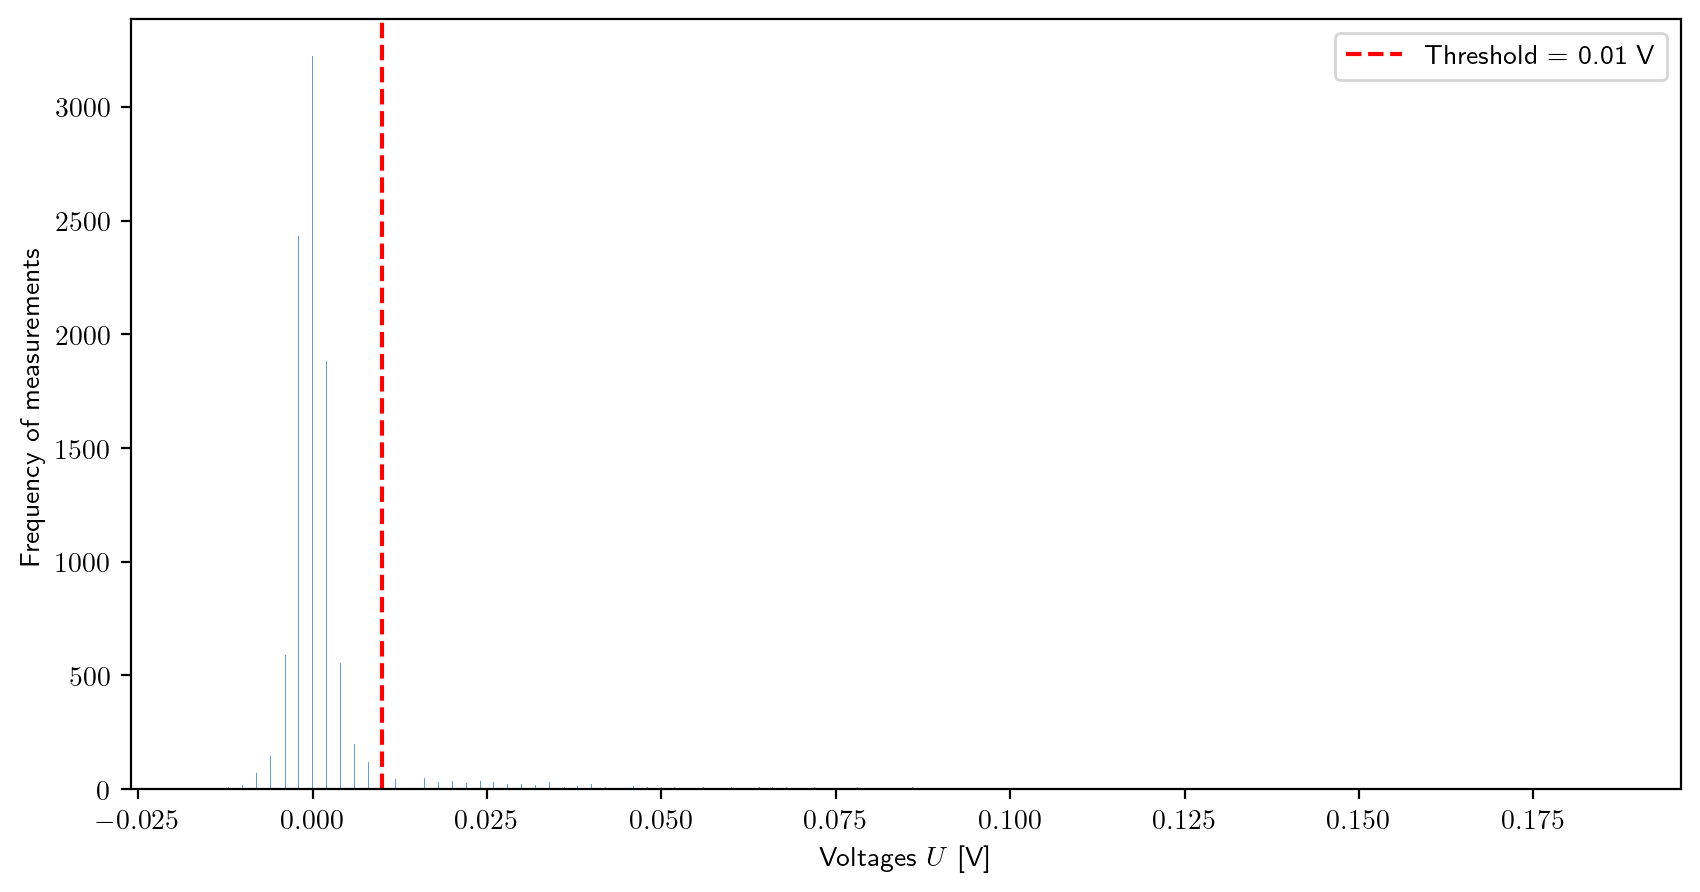

In [ ]:
plt.figure(figsize=(10,5), dpi=200)
plt.hist(U_1, bins=1500, alpha=0.7)
plt.xlabel(r"Voltages $U$ [V]")
plt.ylabel(r"Frequency of measurements")
threshold = 0.010  
plt.axvline(threshold, color='red', linestyle='--', label=f"Threshold = {threshold} V")
plt.legend()

plt.savefig("Aufgabe_1_threshold_value.pdf")
plt.show()


### Detection of peaks and the resulting SPE diagrams + Abzug baseline

0


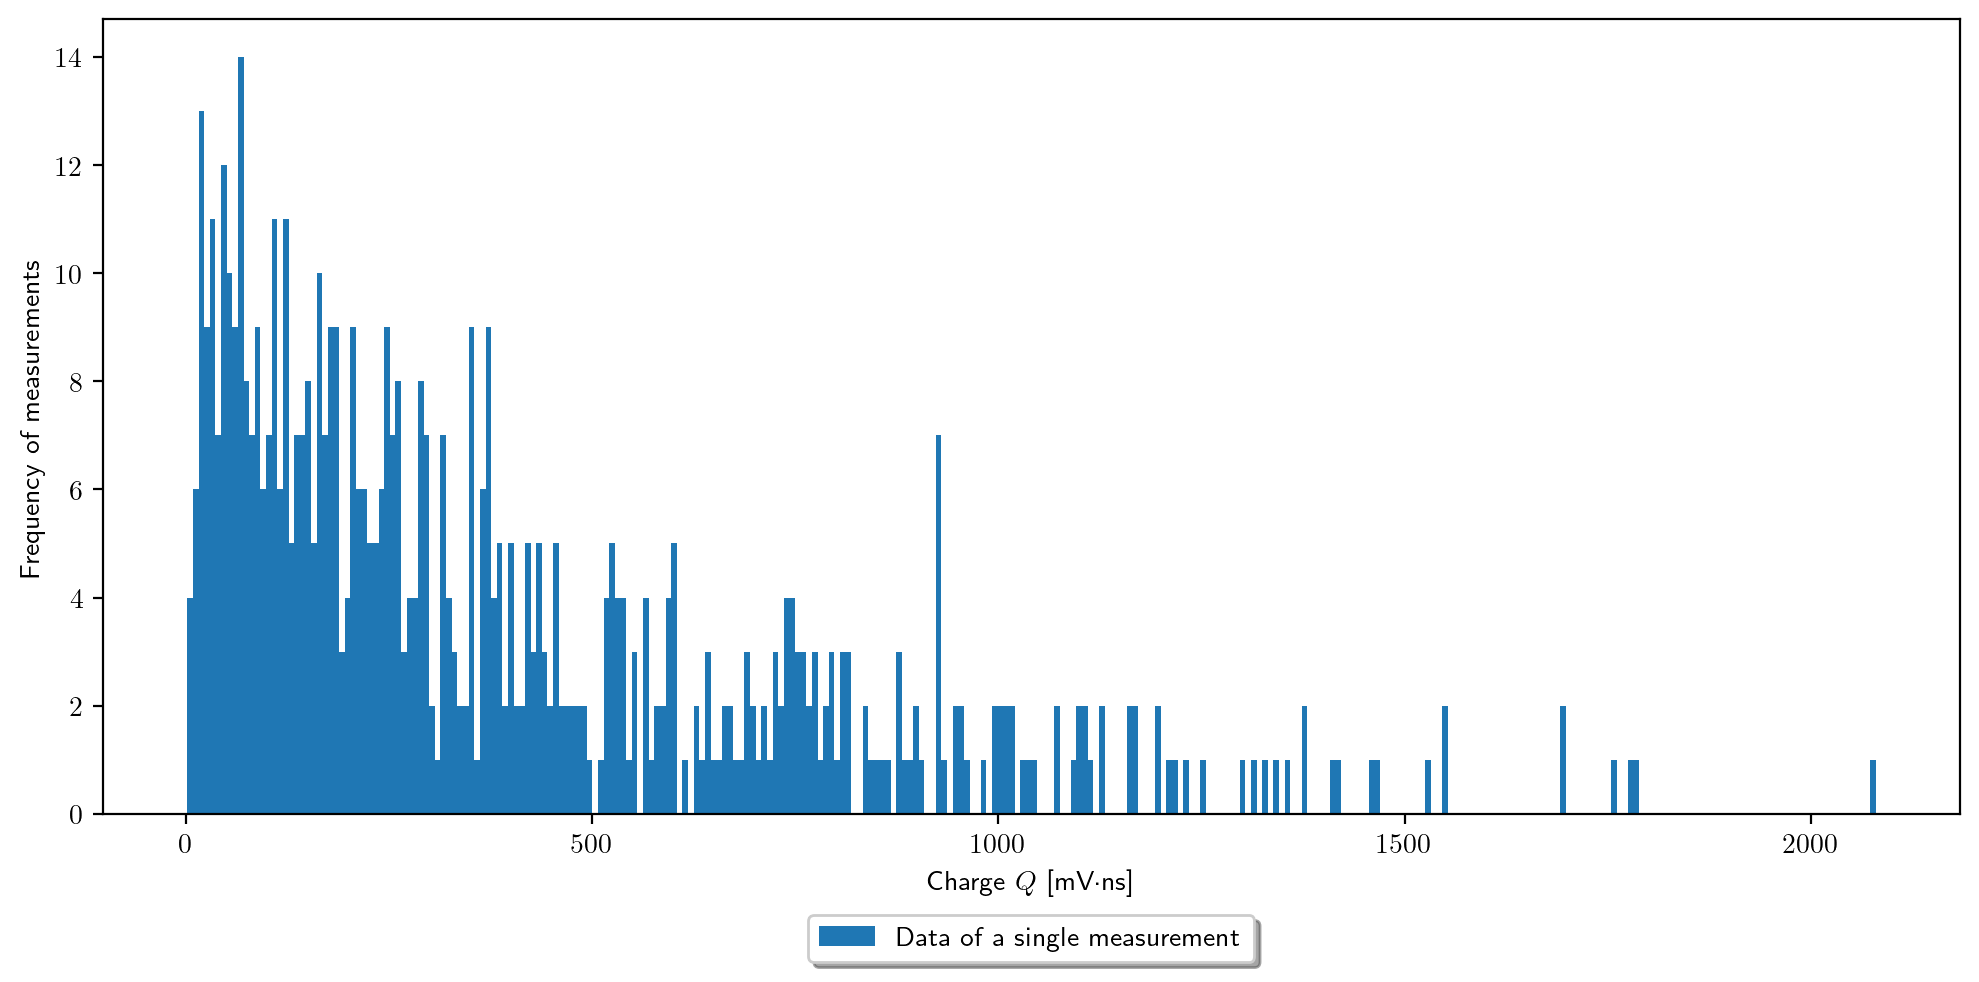

Datei 0: 645 Peaks gefunden.
Zeitspanne der Messung: 1.00e-04 s
Zeitabstand zwischen Datenpunkten: 1.00e-08 s
peak_distance (Samples): 1



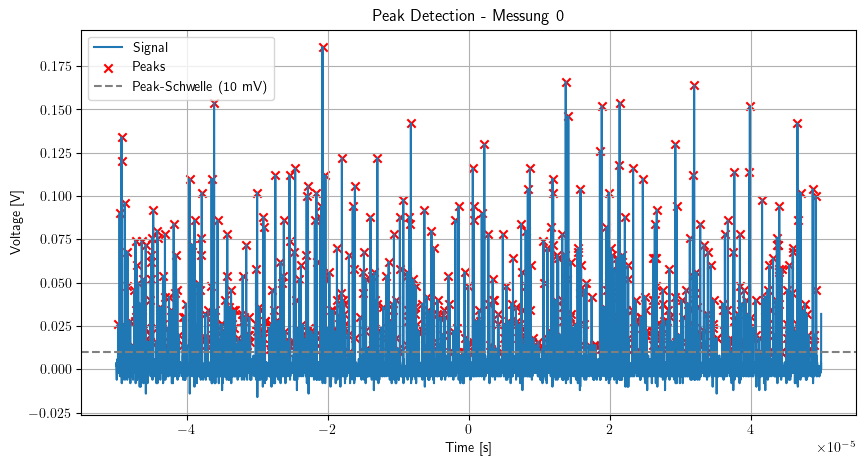

1


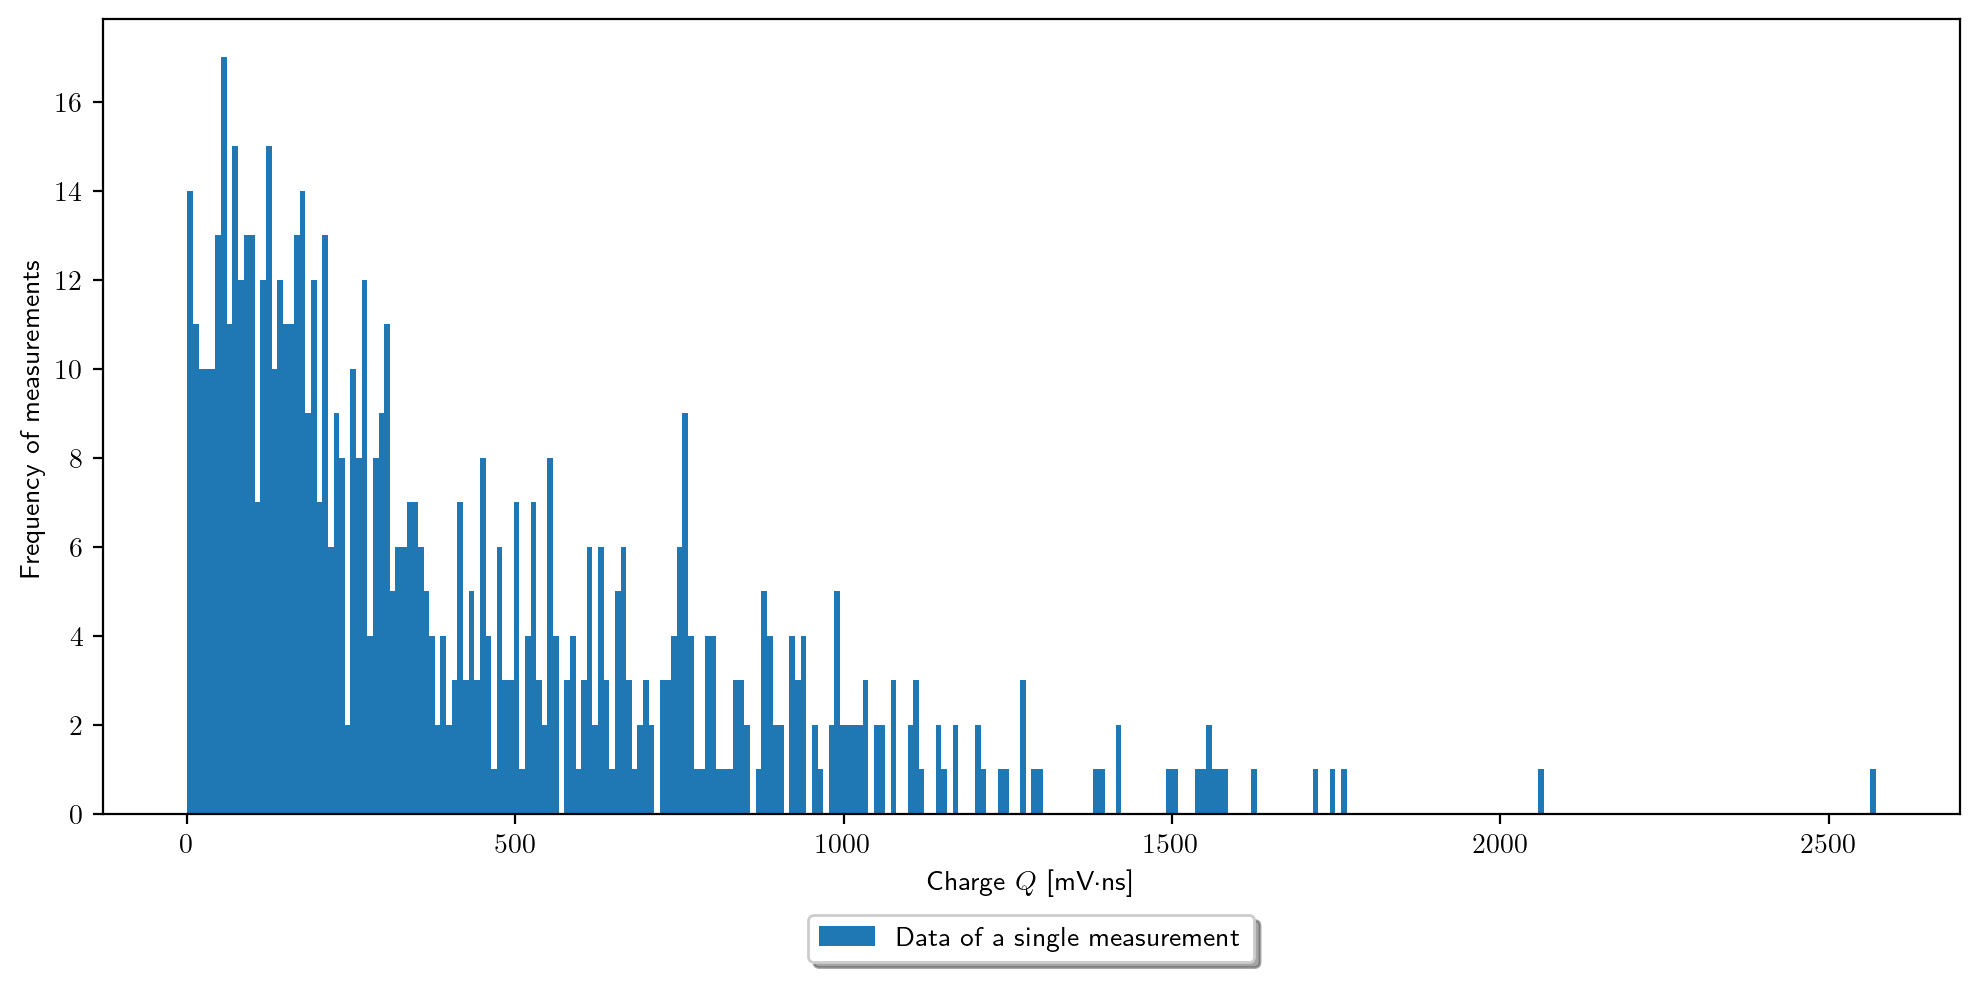

Datei 1: 775 Peaks gefunden.
Zeitspanne der Messung: 1.00e-04 s
Zeitabstand zwischen Datenpunkten: 1.00e-08 s
peak_distance (Samples): 1



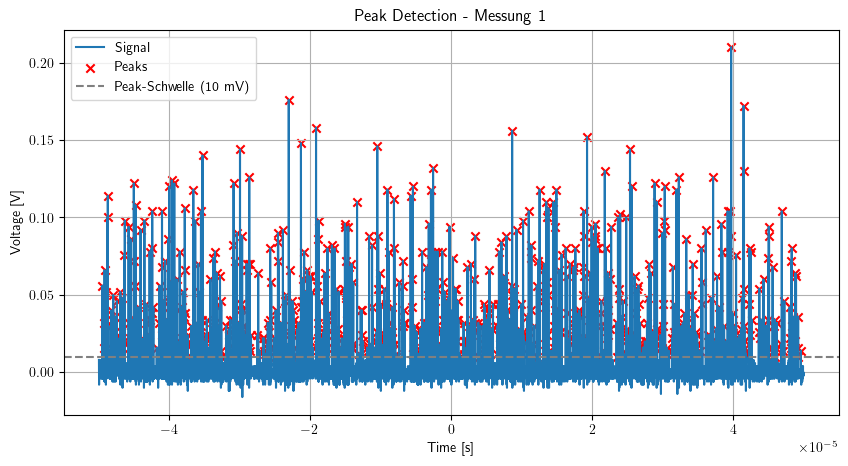

2


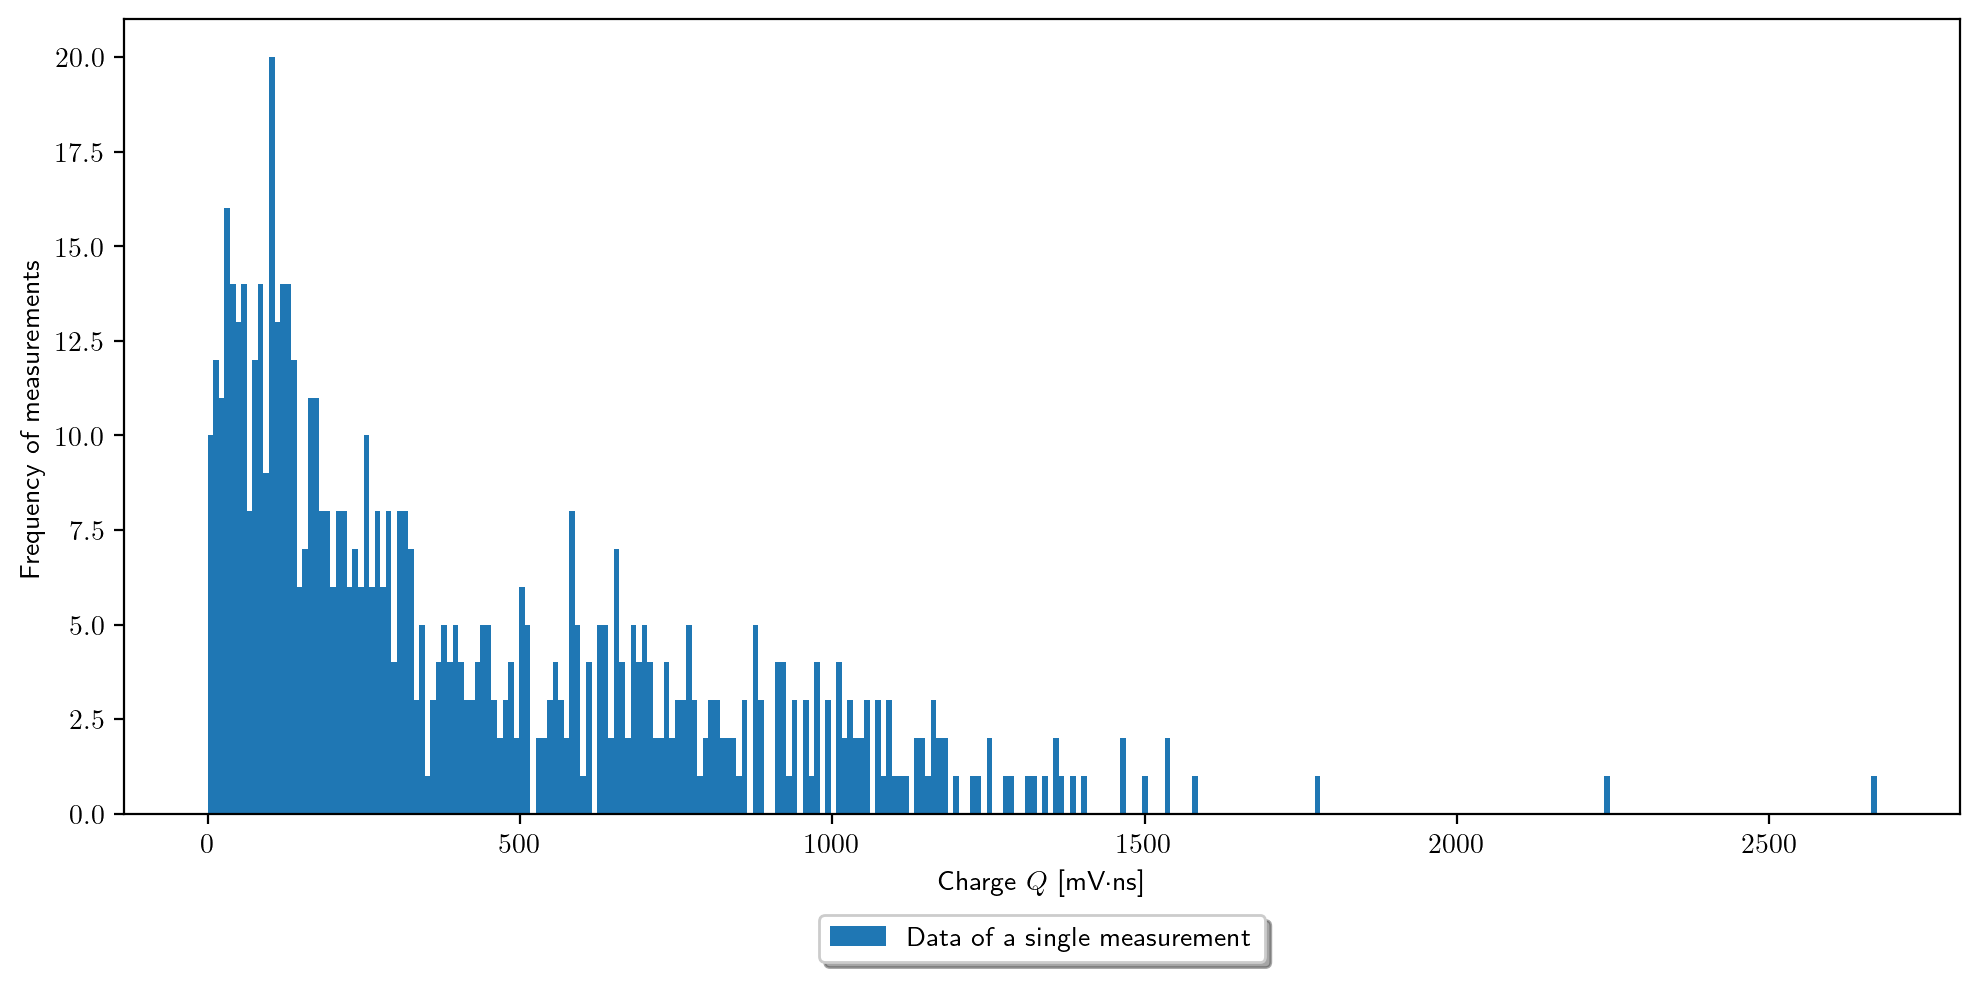

Datei 2: 697 Peaks gefunden.
Zeitspanne der Messung: 1.00e-04 s
Zeitabstand zwischen Datenpunkten: 1.00e-08 s
peak_distance (Samples): 1



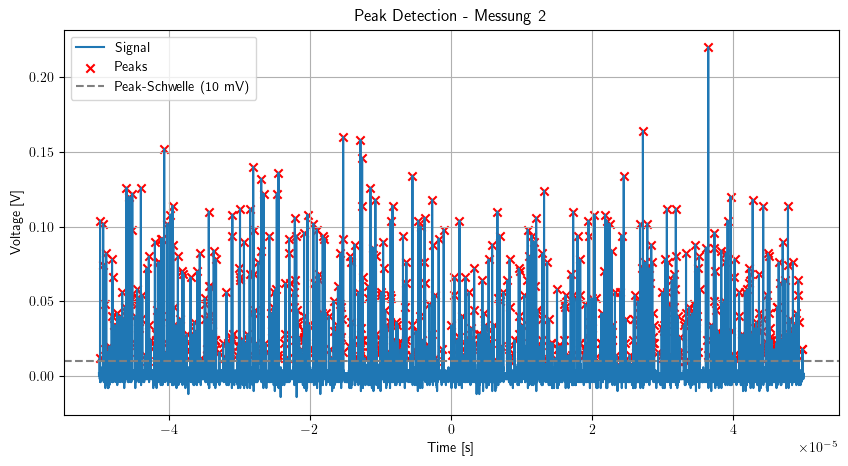

3


/Users/zarahaigner/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/zarahaigner/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


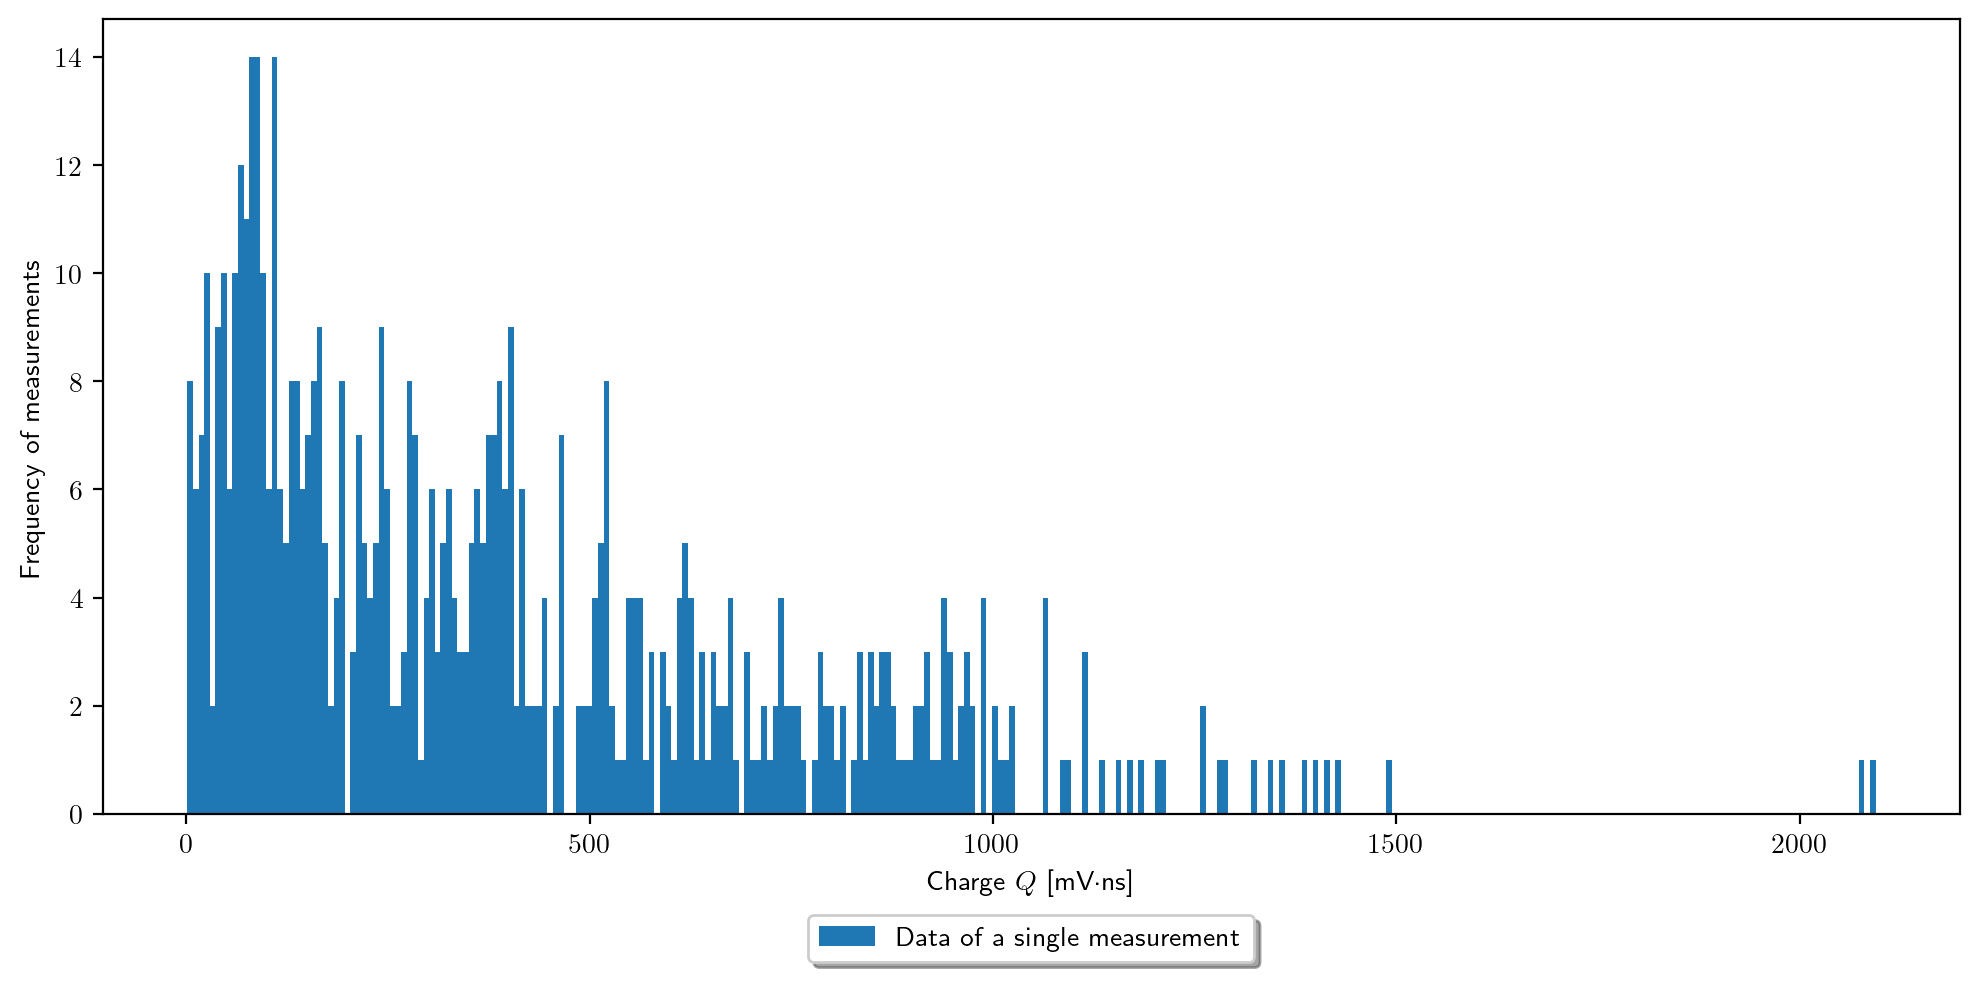

Datei 3: 632 Peaks gefunden.
Zeitspanne der Messung: 1.00e-04 s
Zeitabstand zwischen Datenpunkten: 1.00e-08 s
peak_distance (Samples): 1



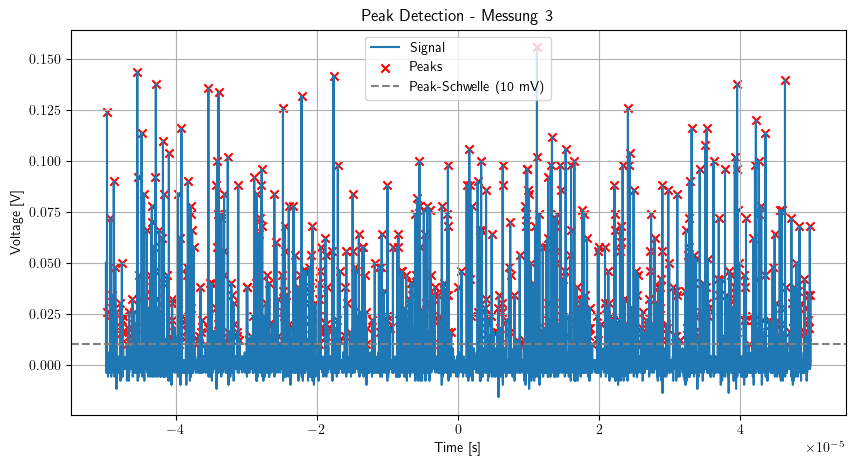

4


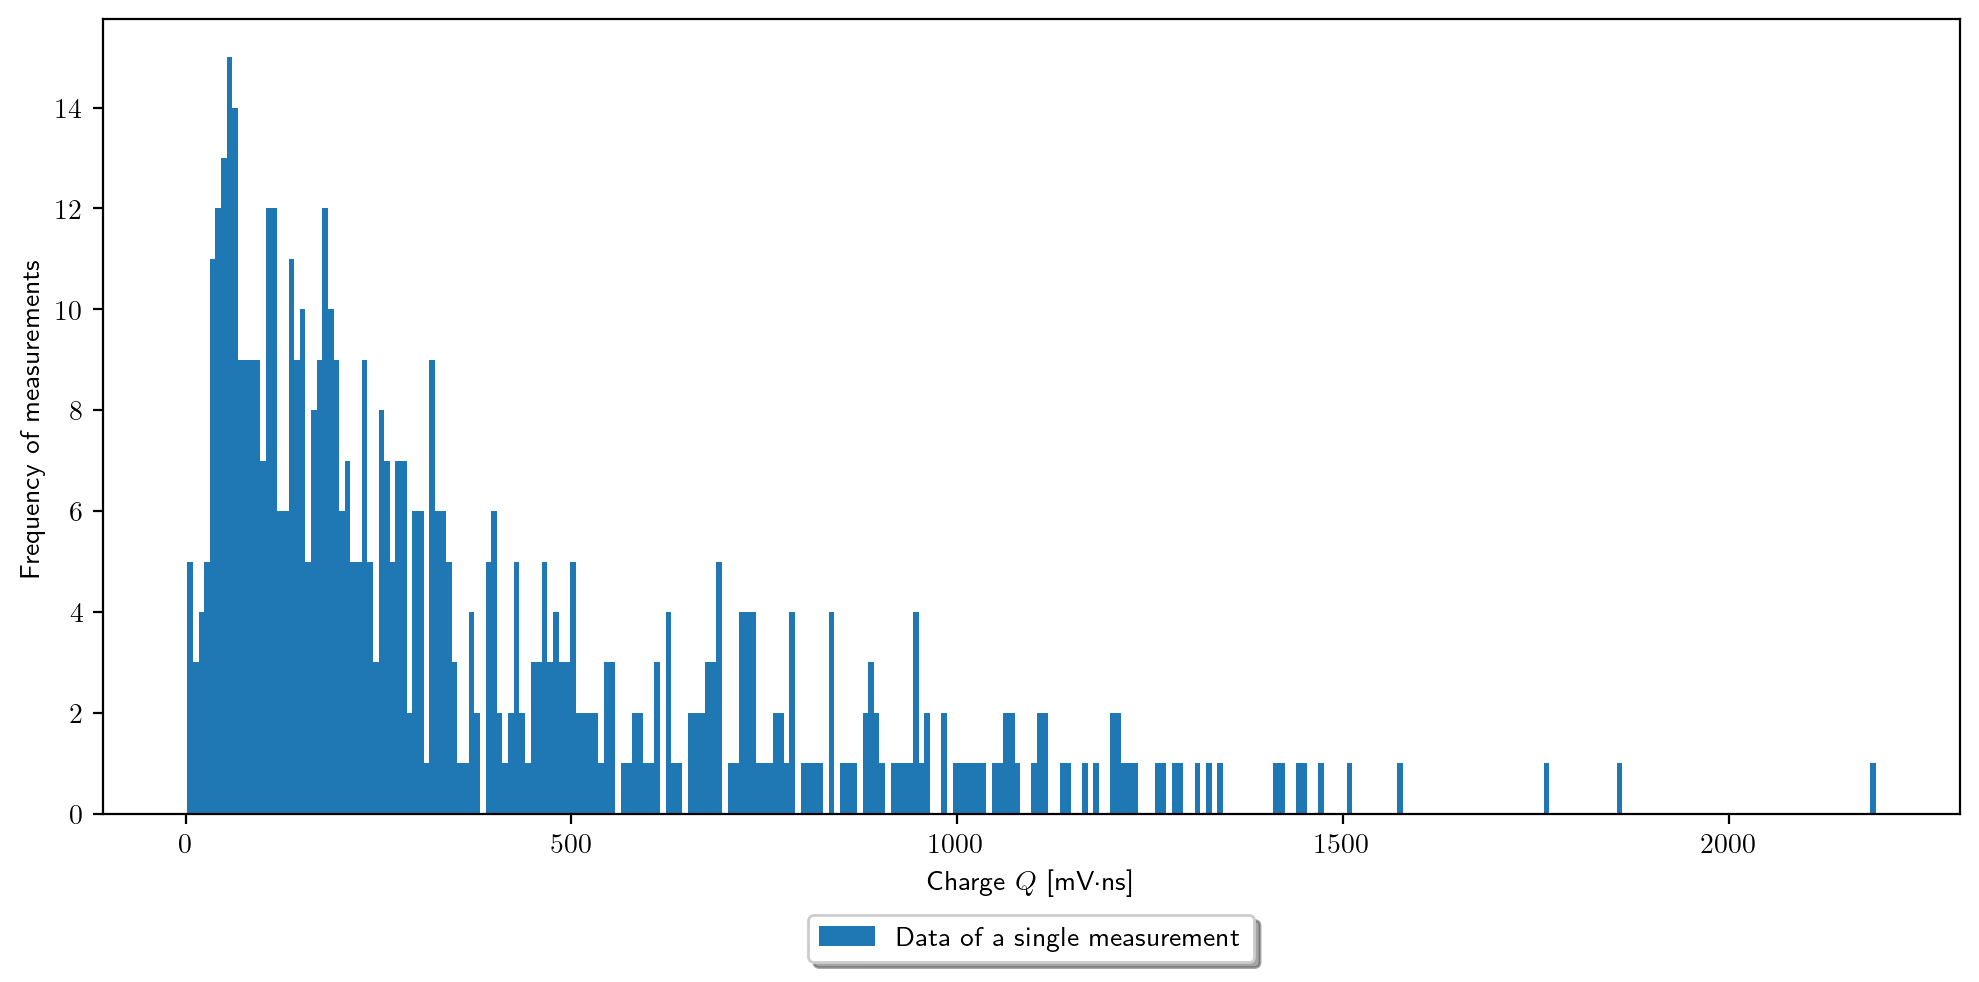

Datei 4: 598 Peaks gefunden.
Zeitspanne der Messung: 1.00e-04 s
Zeitabstand zwischen Datenpunkten: 1.00e-08 s
peak_distance (Samples): 1



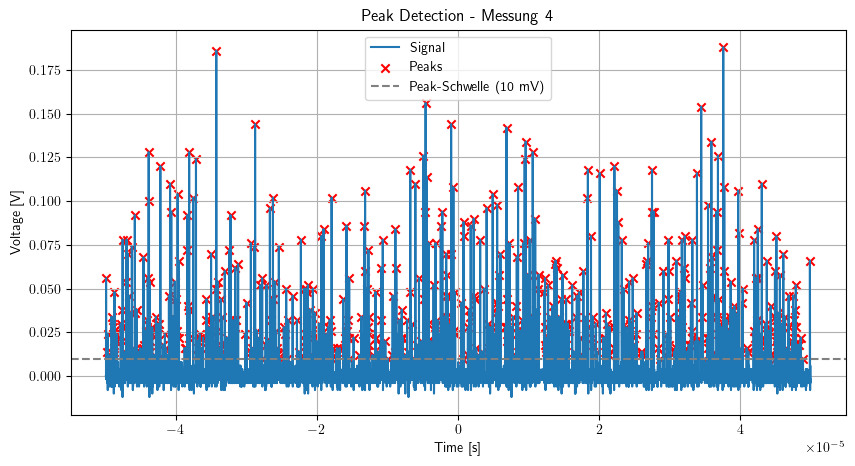

5


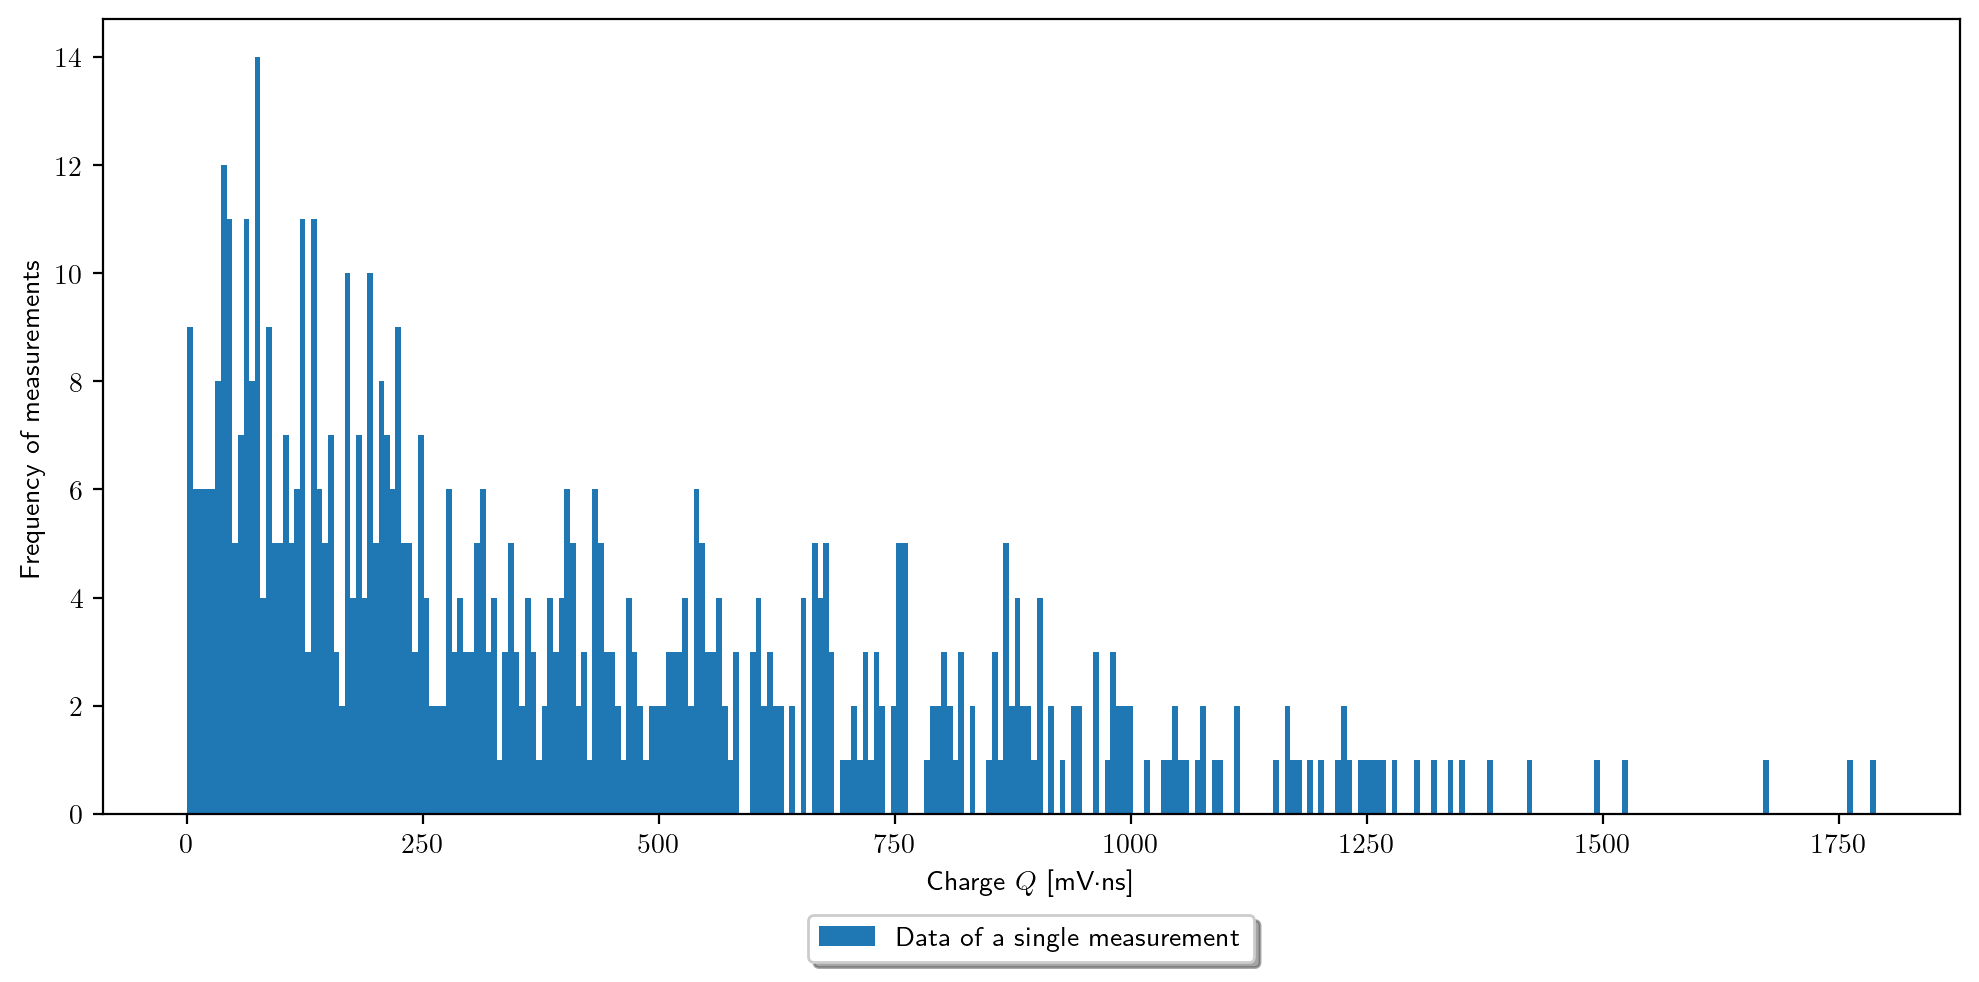

Datei 5: 694 Peaks gefunden.
Zeitspanne der Messung: 1.00e-04 s
Zeitabstand zwischen Datenpunkten: 1.00e-08 s
peak_distance (Samples): 1



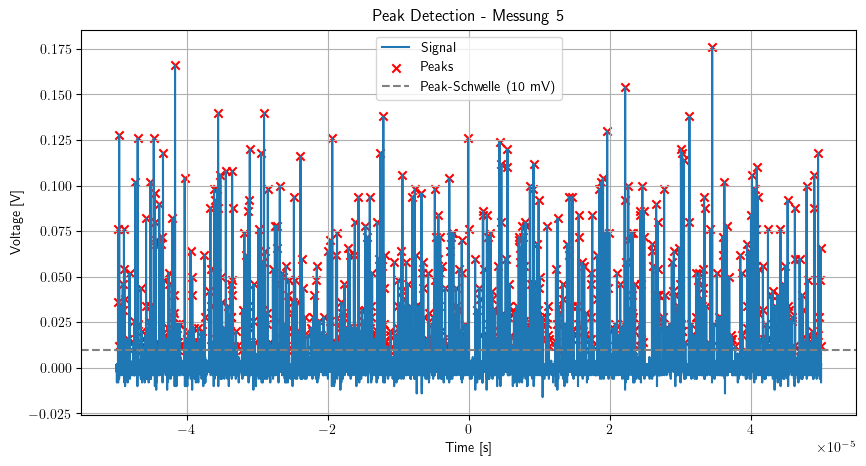

6


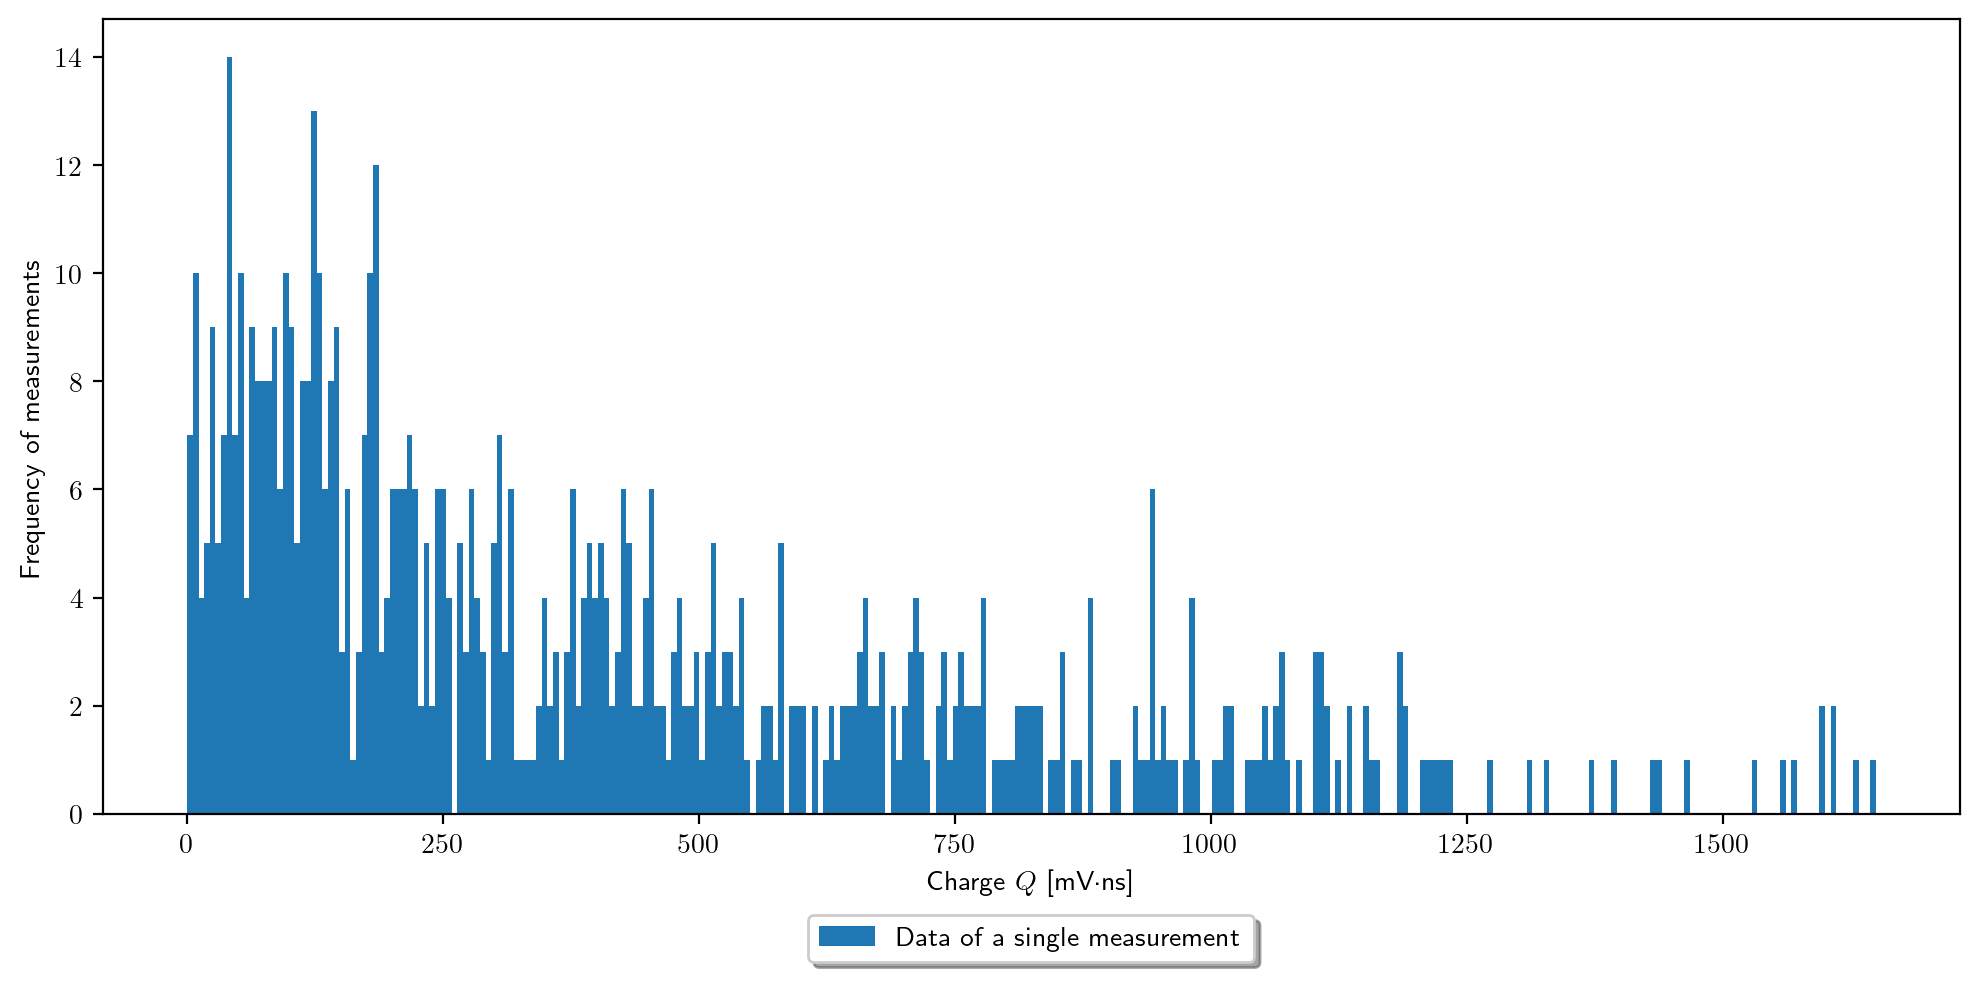

Datei 6: 747 Peaks gefunden.
Zeitspanne der Messung: 1.00e-04 s
Zeitabstand zwischen Datenpunkten: 1.00e-08 s
peak_distance (Samples): 1



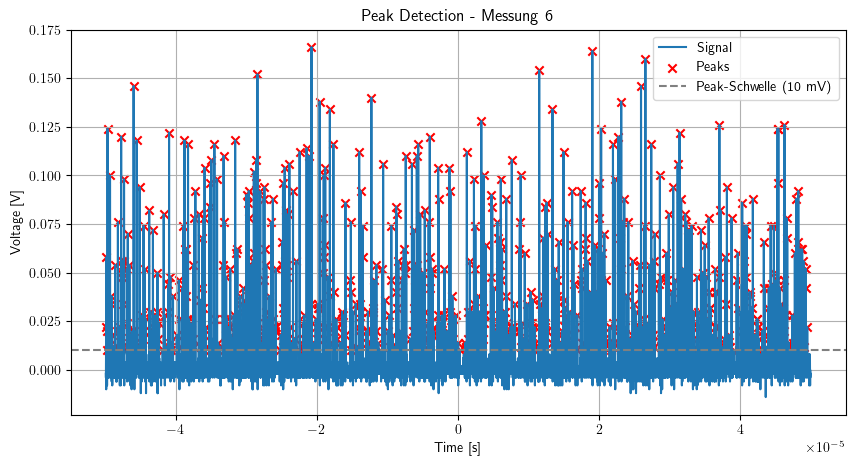

7


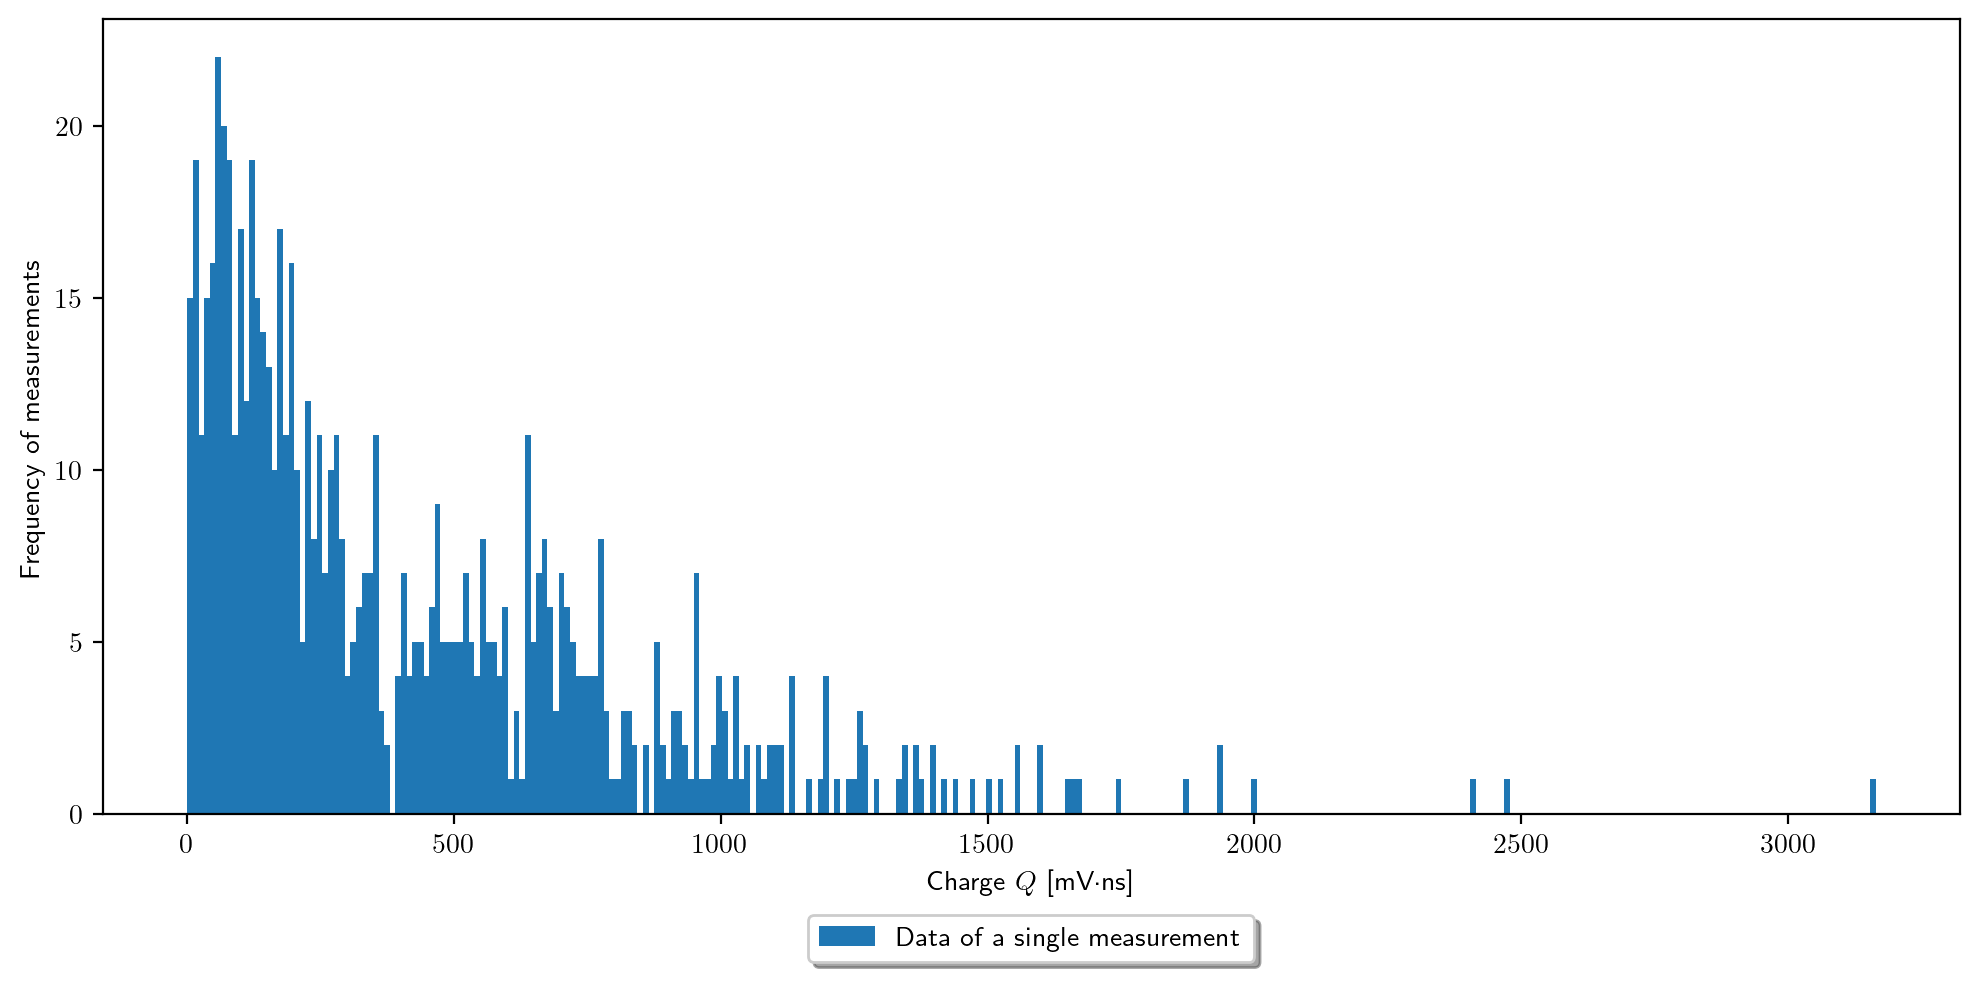

Datei 7: 822 Peaks gefunden.
Zeitspanne der Messung: 1.00e-04 s
Zeitabstand zwischen Datenpunkten: 1.00e-08 s
peak_distance (Samples): 1



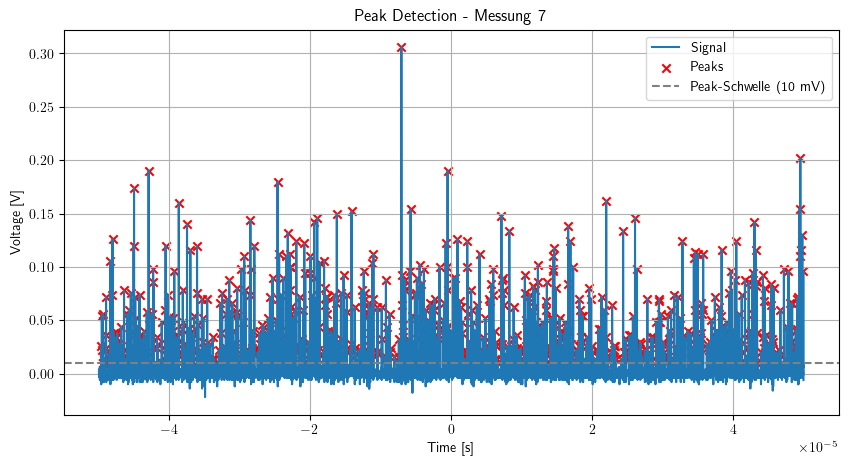

8


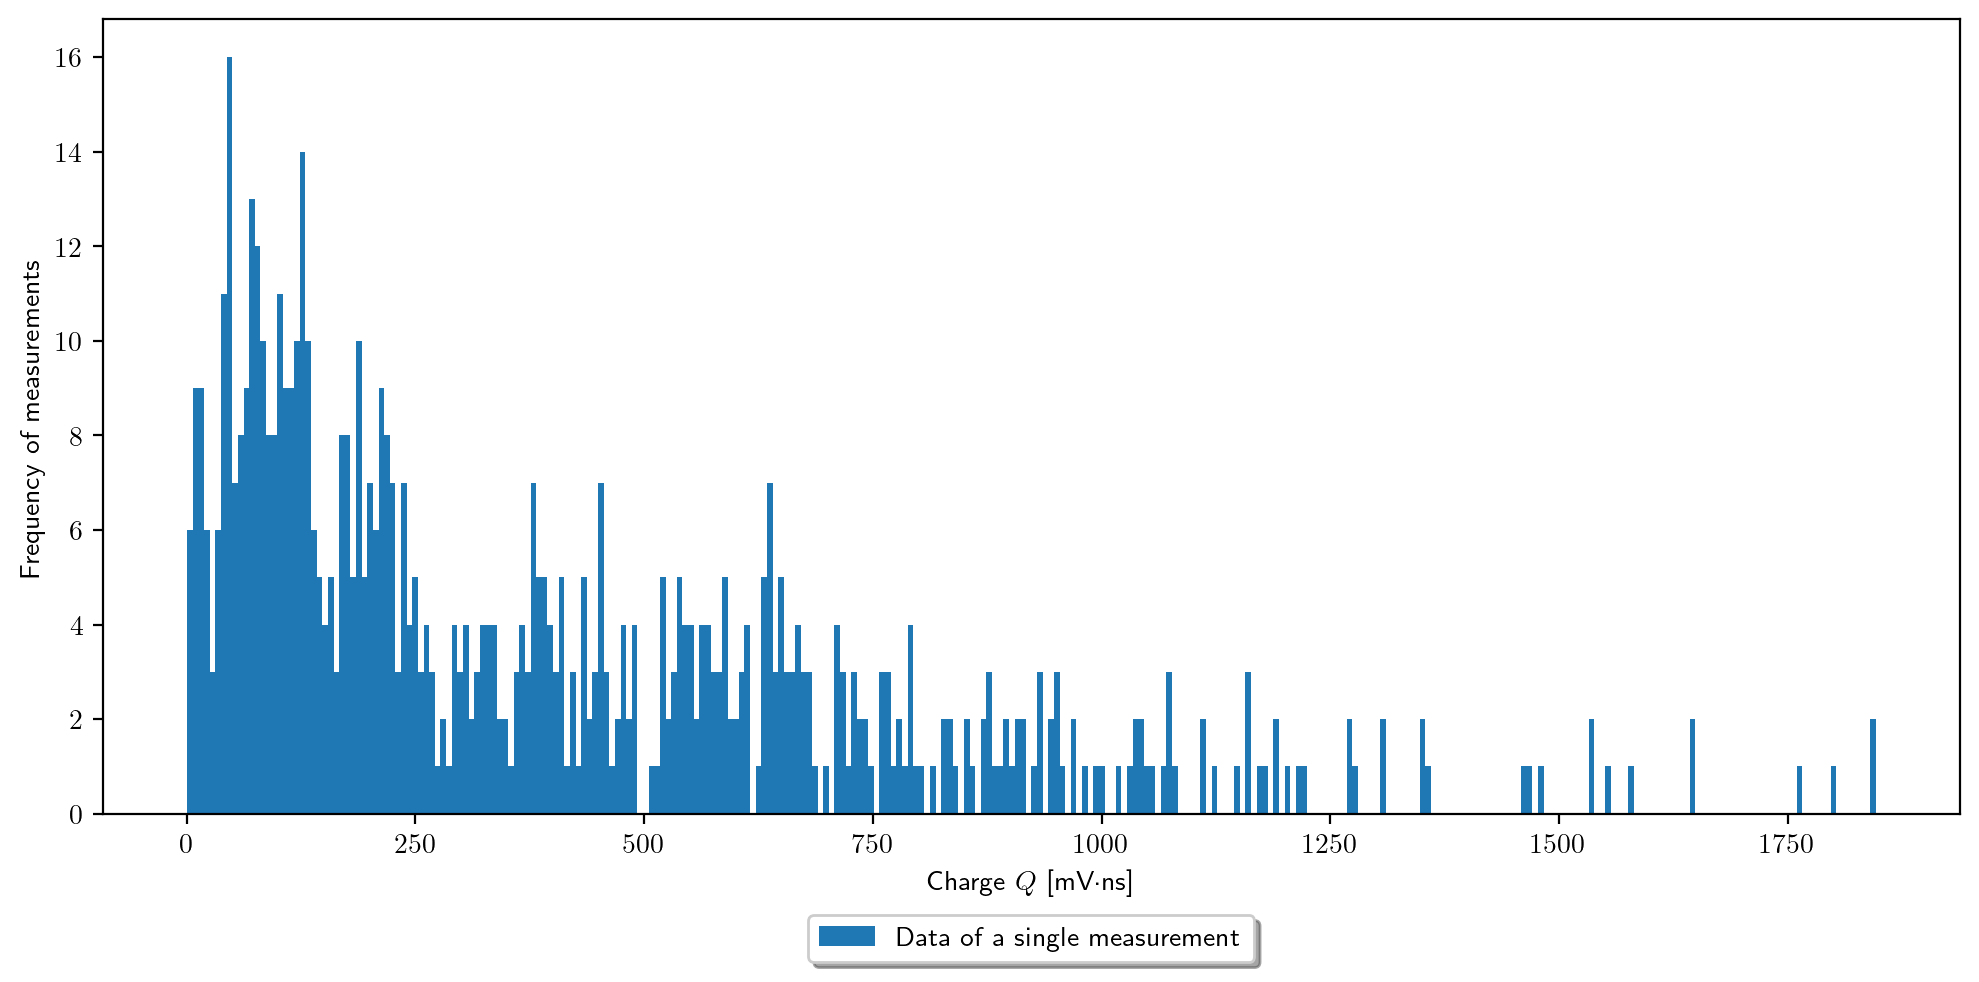

Datei 8: 711 Peaks gefunden.
Zeitspanne der Messung: 1.00e-04 s
Zeitabstand zwischen Datenpunkten: 1.00e-08 s
peak_distance (Samples): 1



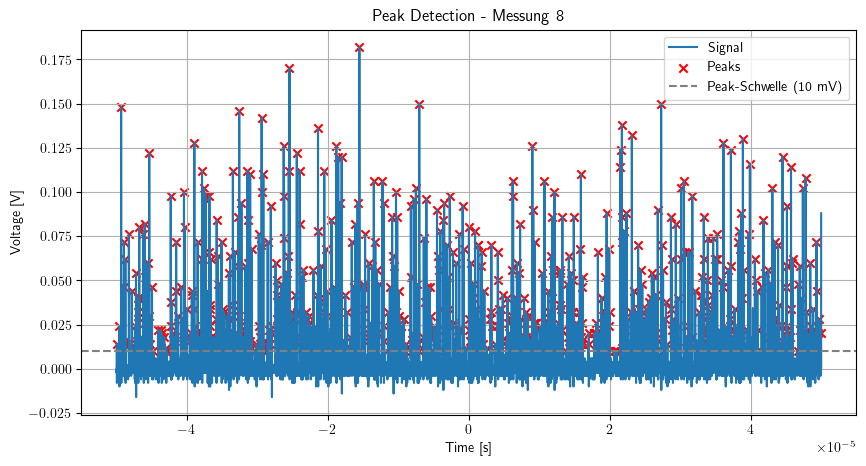

9


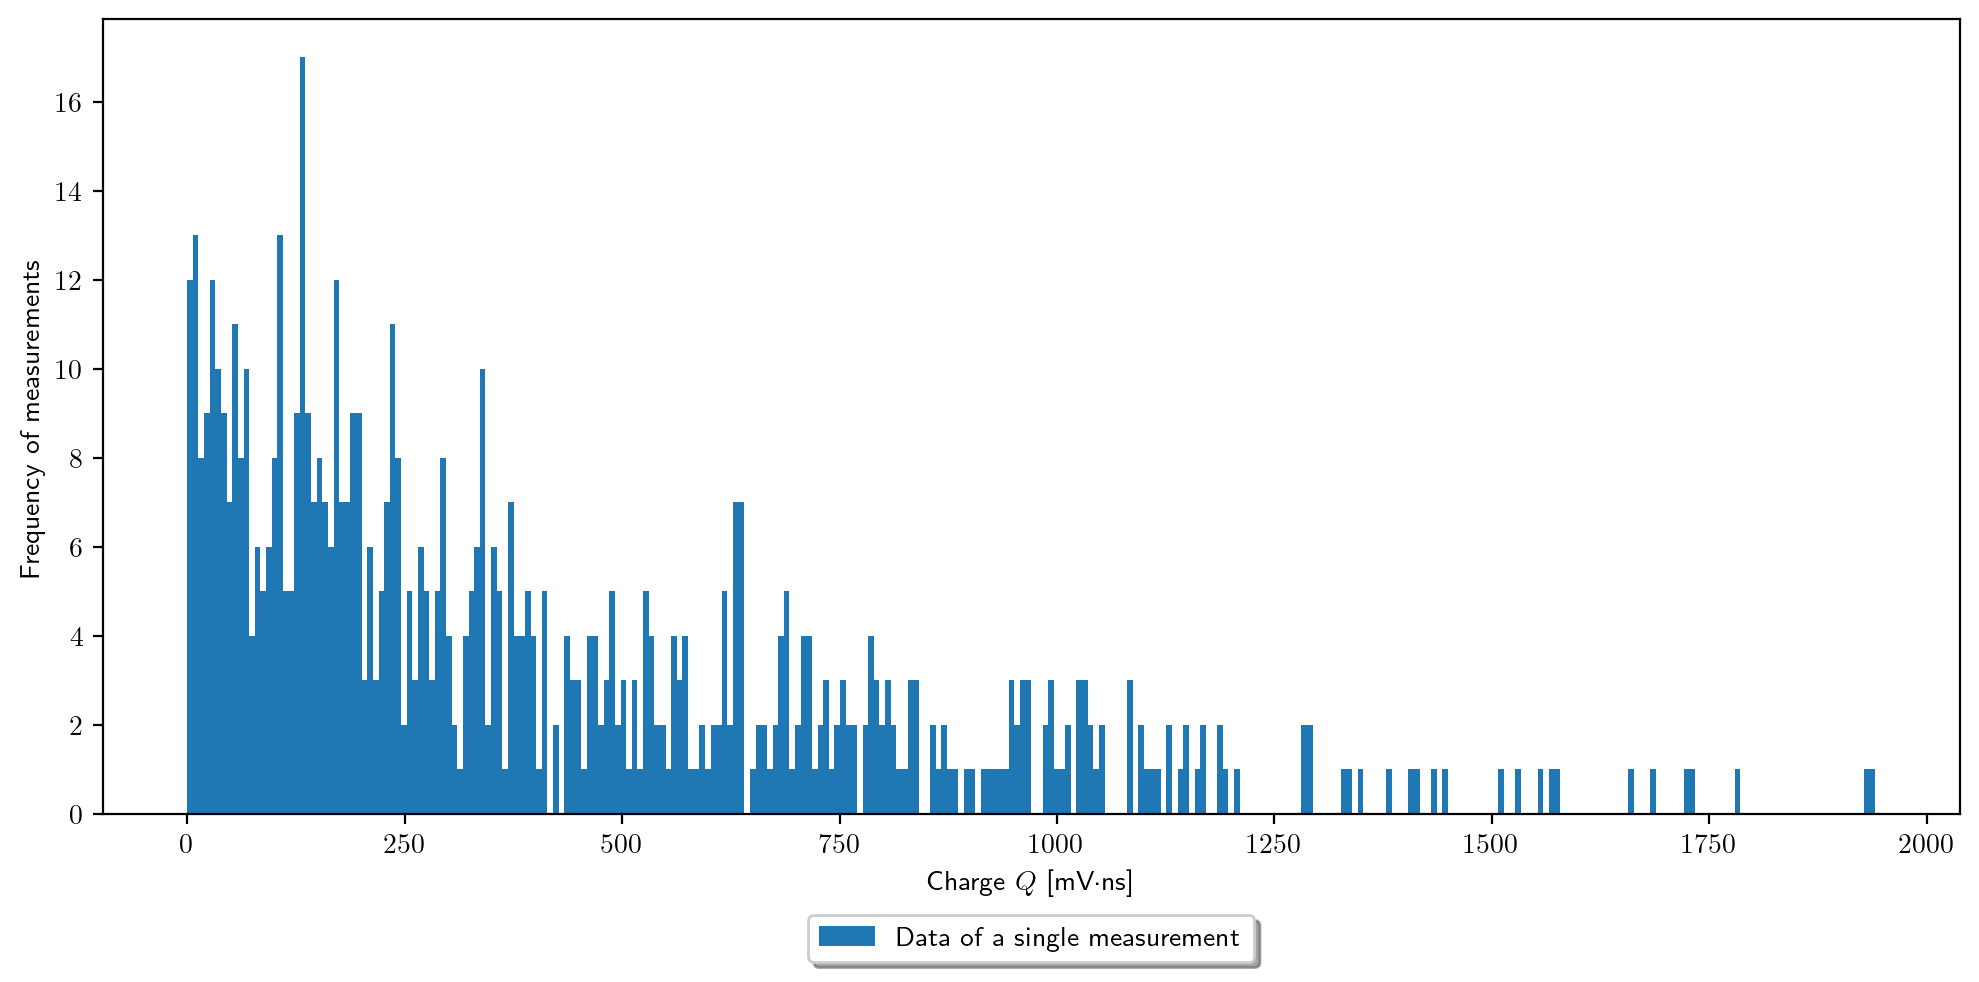

Datei 9: 749 Peaks gefunden.
Zeitspanne der Messung: 1.00e-04 s
Zeitabstand zwischen Datenpunkten: 1.00e-08 s
peak_distance (Samples): 1



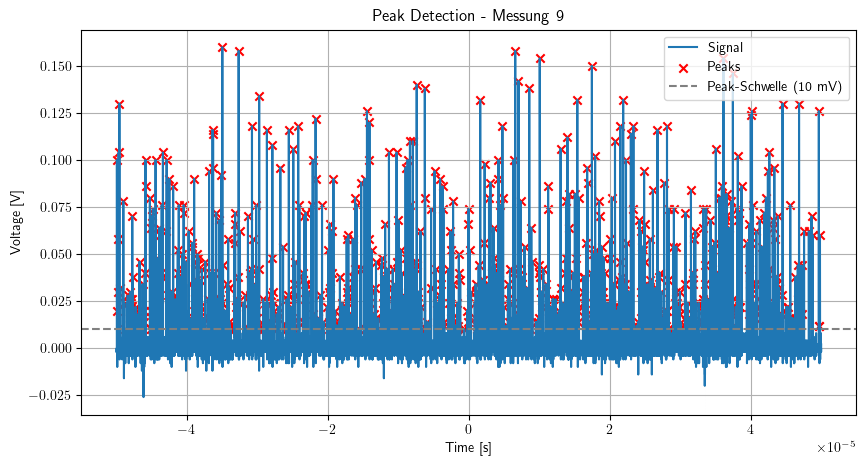

10


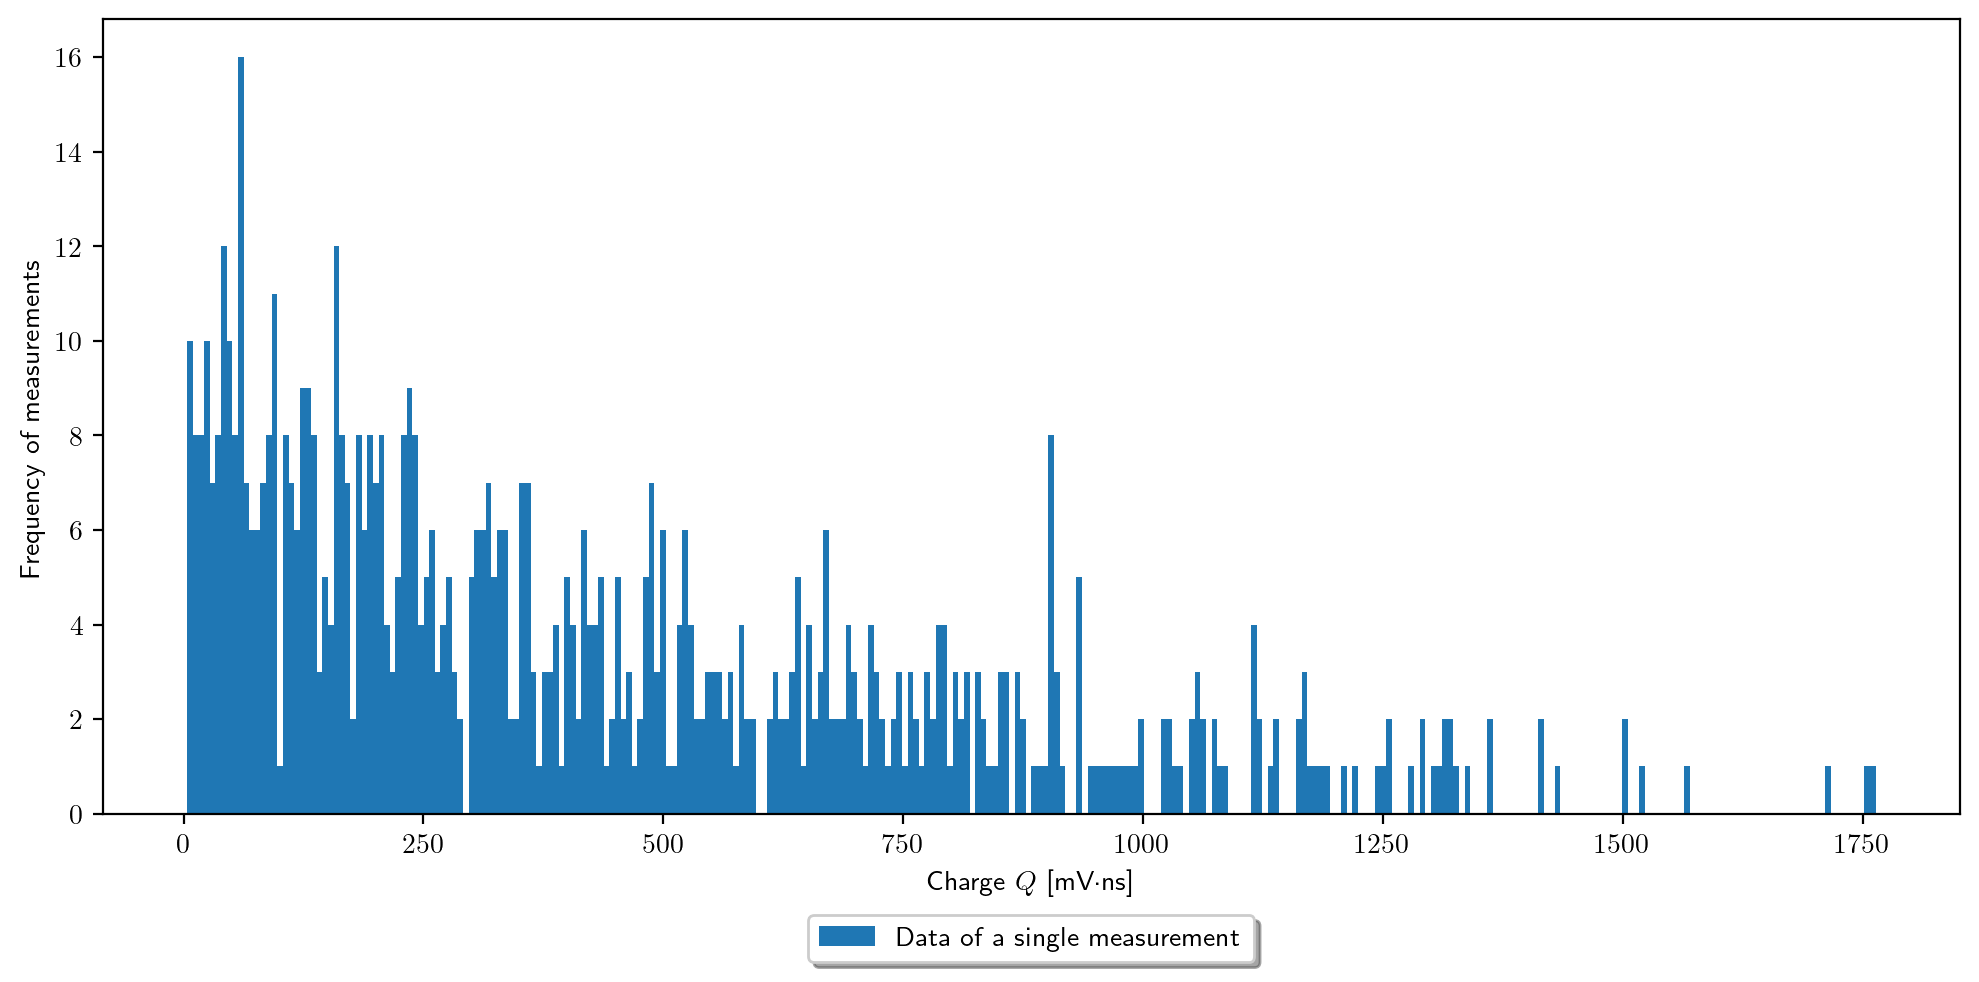

Datei 10: 806 Peaks gefunden.
Zeitspanne der Messung: 1.00e-04 s
Zeitabstand zwischen Datenpunkten: 1.00e-08 s
peak_distance (Samples): 1



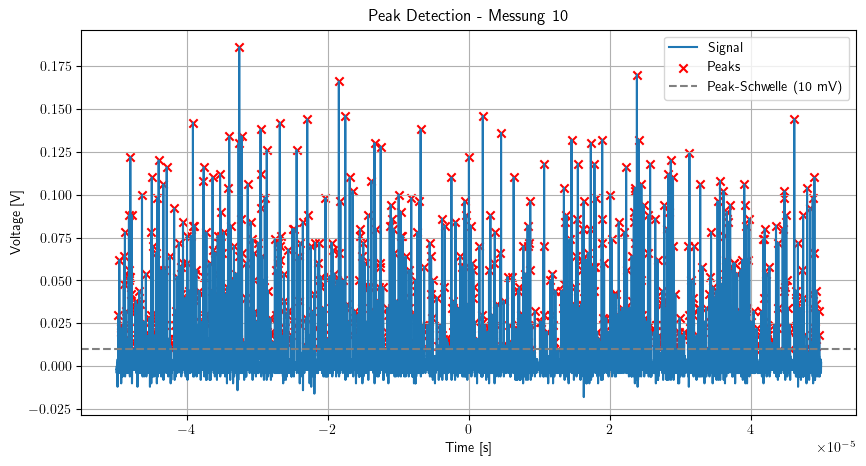

11


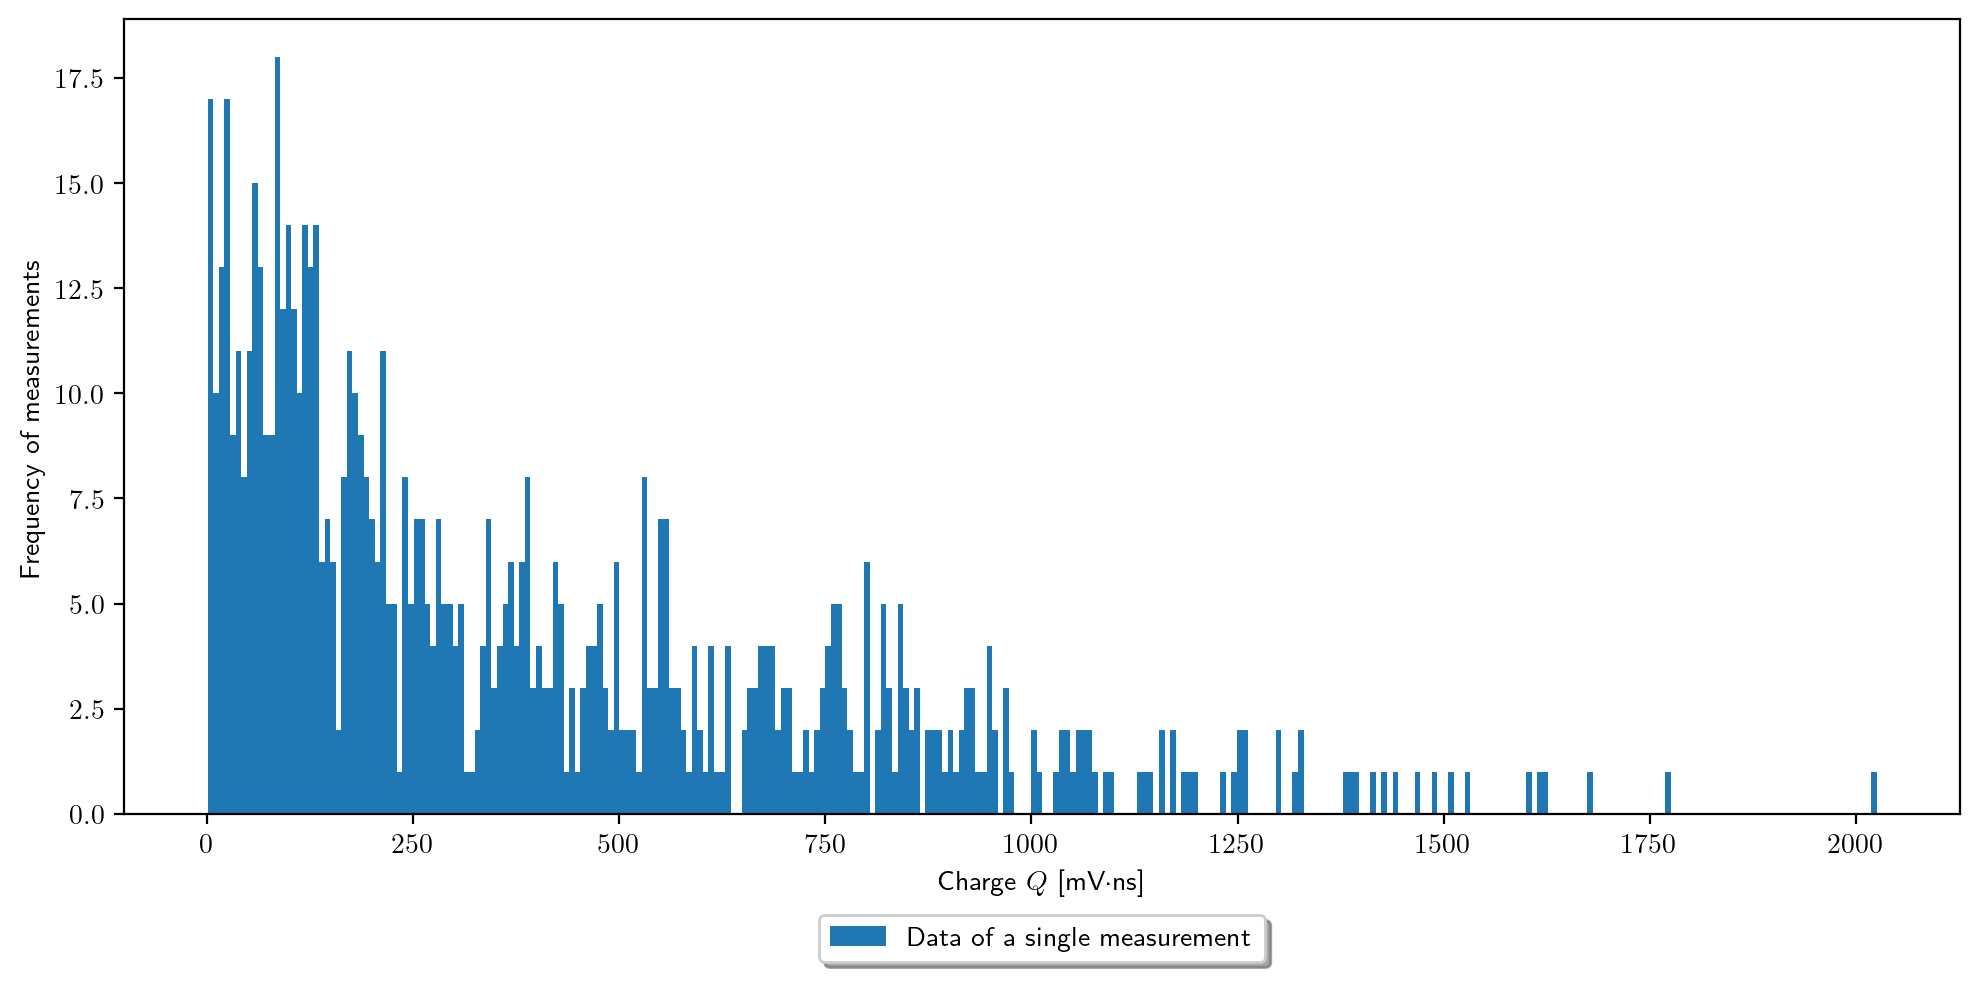

Datei 11: 849 Peaks gefunden.
Zeitspanne der Messung: 1.00e-04 s
Zeitabstand zwischen Datenpunkten: 1.00e-08 s
peak_distance (Samples): 1



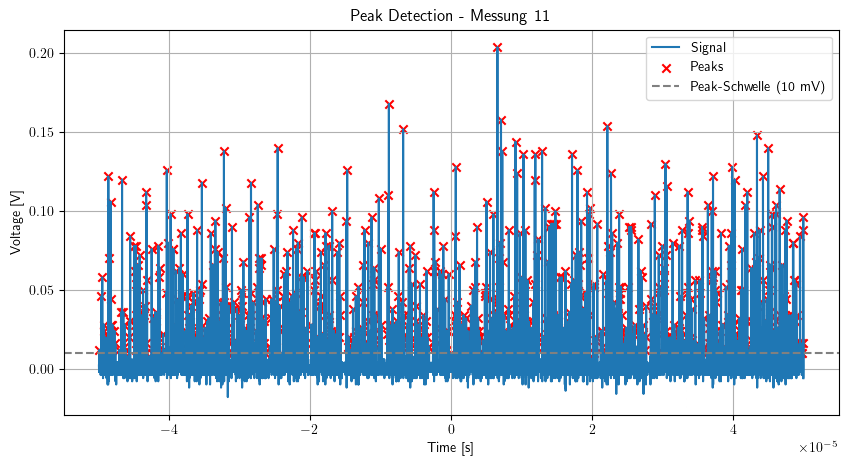

12


/Users/zarahaigner/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/zarahaigner/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


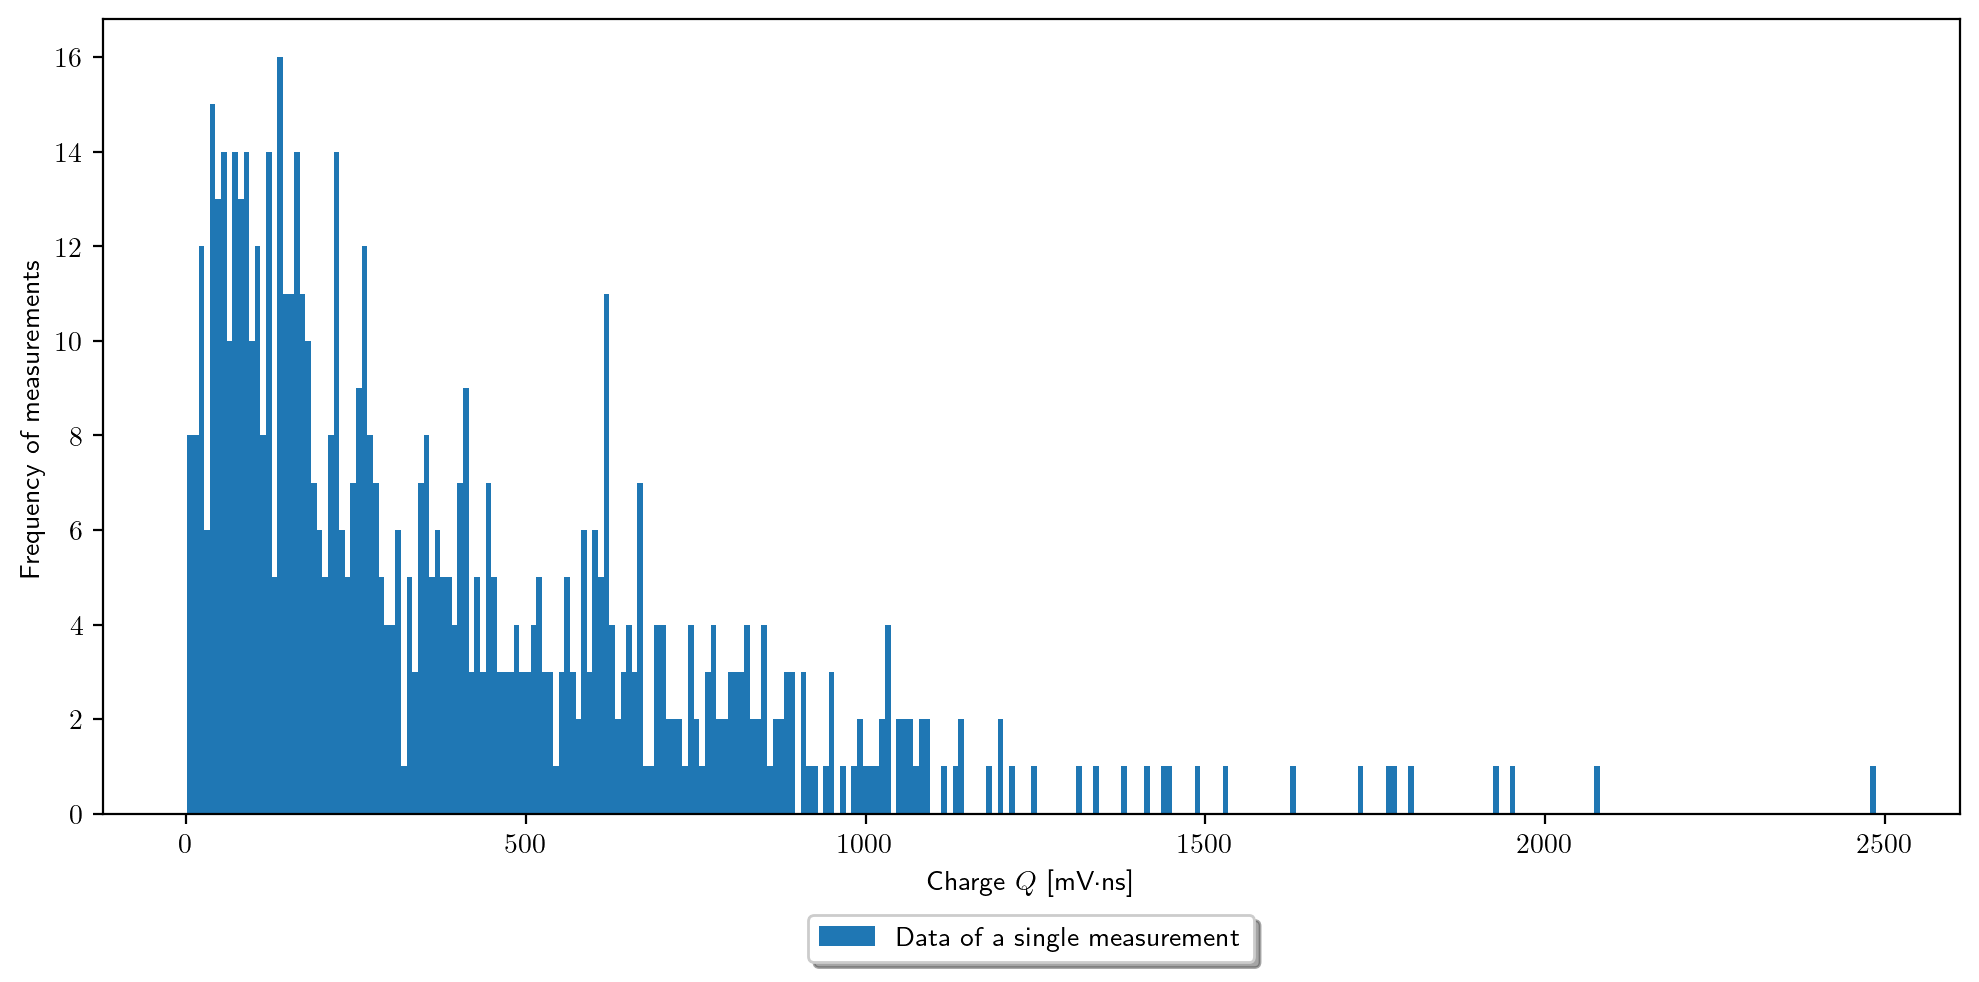

Datei 12: 745 Peaks gefunden.
Zeitspanne der Messung: 1.00e-04 s
Zeitabstand zwischen Datenpunkten: 1.00e-08 s
peak_distance (Samples): 1



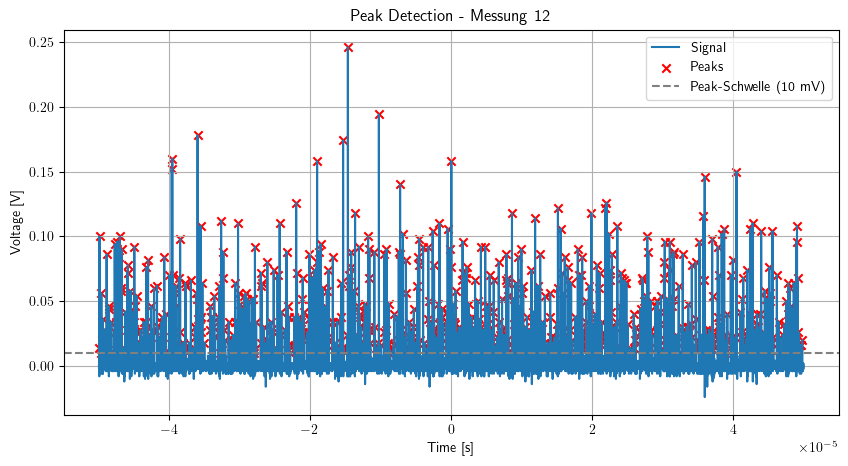

13


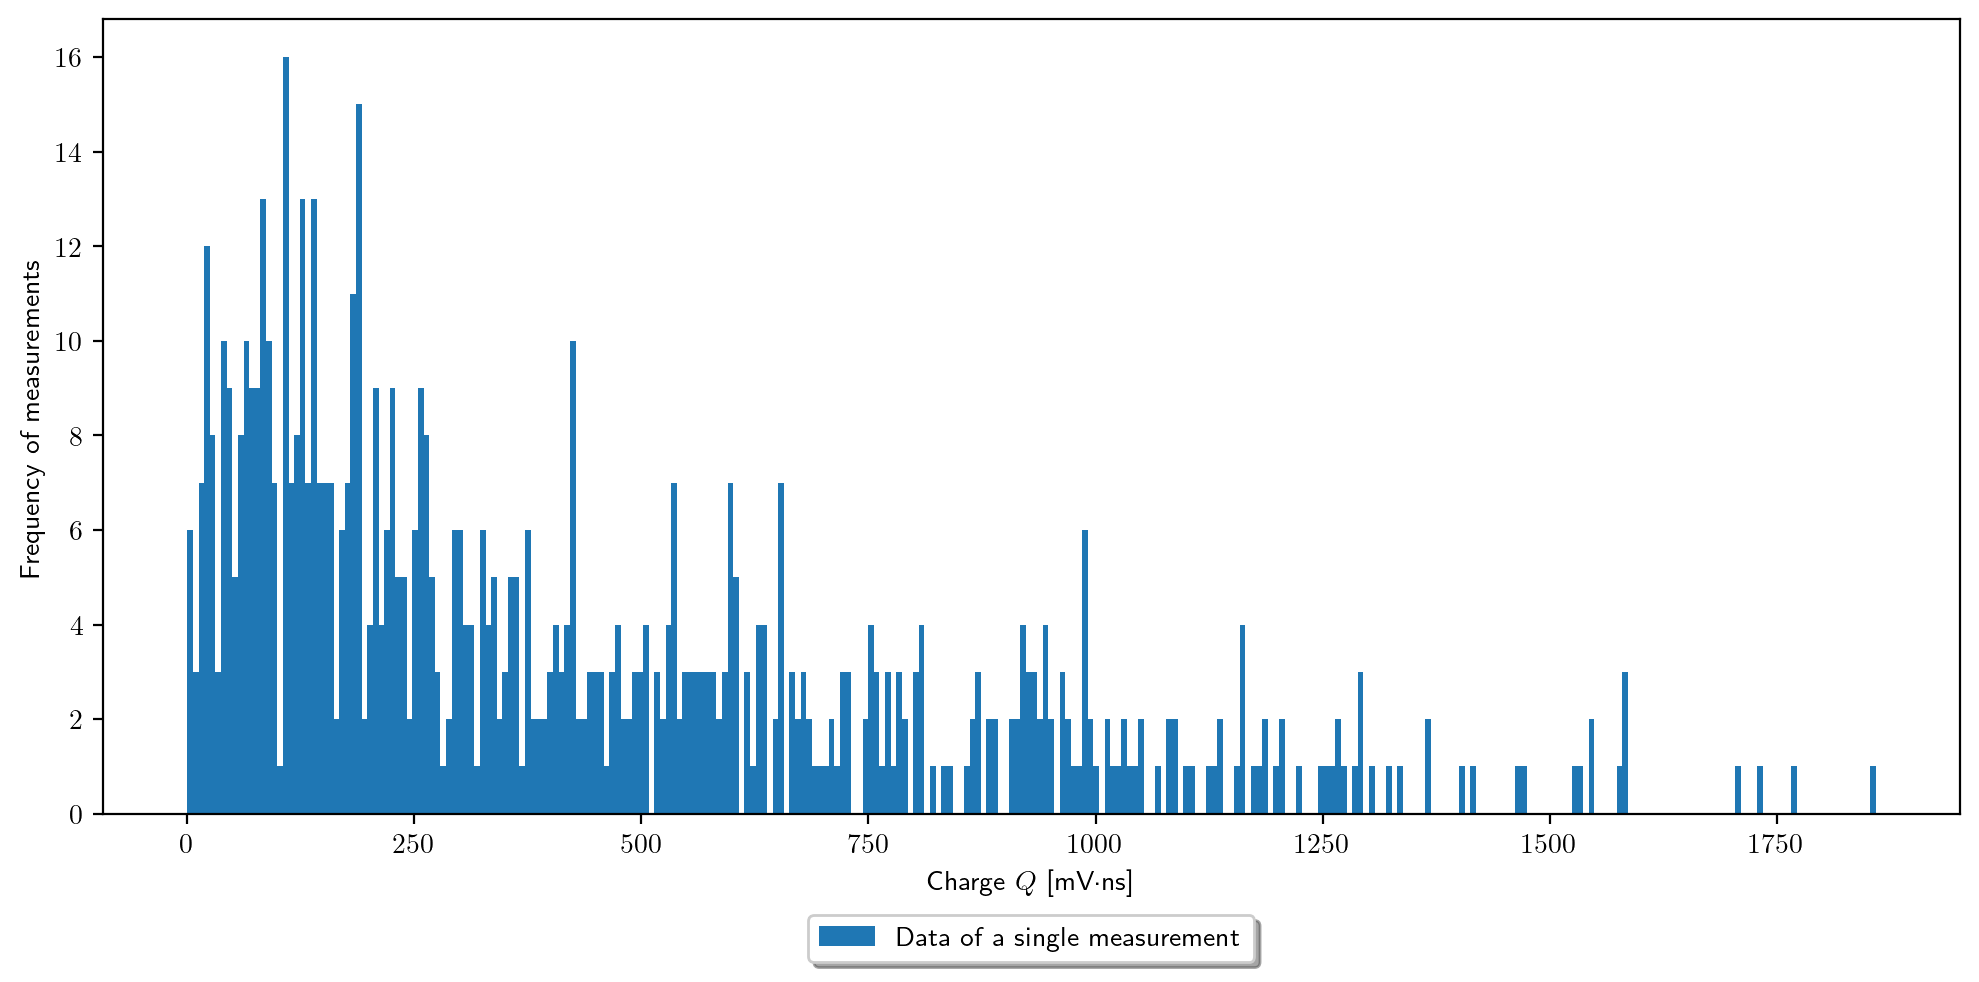

Datei 13: 773 Peaks gefunden.
Zeitspanne der Messung: 1.00e-04 s
Zeitabstand zwischen Datenpunkten: 1.00e-08 s
peak_distance (Samples): 1



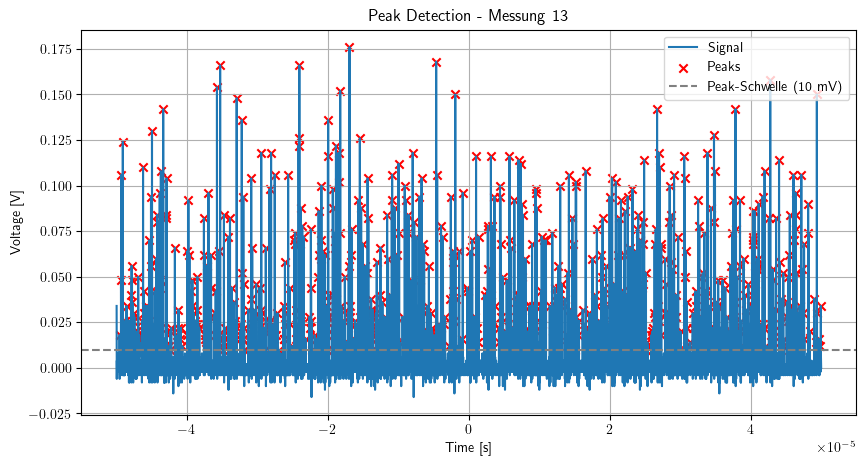

In [ ]:
from scipy.signal import find_peaks

peak_height = 0.010  # = 10 mV
peak_distance_ns = 10 # distance between two peaks must be 10 ns
all_Q_values = []

for i in range(len(data)):
    print(i)

    x_value = np.array(data[i+2]["TIME"])        # [s]
    y_value = np.array(data[i+2]["CH1"])         # [V]

    Zeitspanne = x_value.max() - x_value.min()
    Zeitabstand = x_value[1] - x_value[0]   #difference between two peaks
    peak_distance = int(round((peak_distance_ns * 1e-9) / Zeitabstand))

    peaks, _ = find_peaks(y_value, height=peak_height, distance=peak_distance) #finding peaks with find_peaks function

    Q_values = []
    window_samples = int(round(50e-9 / Zeitabstand))

    for peak in peaks:

        start = max(0, peak - window_samples//2)
        end = min(len(x_value), peak + window_samples//2)

        # Baseline just before the peak occured 
        baseline = np.mean(y_value[max(0, peak-100):peak-5])

        # integration in mV ns
        Q_peak_mVns = np.trapz(
            (y_value[start:end] - baseline) * 1e3,   # V -> mV
            x_value[start:end] * 1e9                # s -> ns
        )

        if Q_peak_mVns > 0:     # only keeping positive values
            Q_values.append(Q_peak_mVns)

    # Pedestal 
    if len(peaks) > 0:
        ped_end = max(0, peaks[0] - window_samples)
        if ped_end > window_samples:
            ped_start = ped_end - window_samples

            baseline_ped = np.mean(y_value[ped_start-window_samples : ped_start])

            Q_ped_mVns = np.trapz(
                (y_value[ped_start:ped_end] - baseline_ped) * 1e3, #subtracting the baseline values
                x_value[ped_start:ped_end] * 1e9
            )

            all_Q_values.append(Q_ped_mVns)

    all_Q_values.extend(Q_values)

    # --- Plot of single measurement ---
    plt.figure(figsize=(10,5), dpi=200)
    plt.hist(Q_values, bins=300, label=r"Data of a single measurement")
    plt.xlabel(r"Charge $Q$ [mV·ns]")
    plt.ylabel(r"Frequency of measurements")
    plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.11), fancybox=True, shadow=True, ncol=2)
    plt.tight_layout()
    plt.savefig(f"Aufgabe_1_single_SPE_{i}.pdf")
    plt.show()

    peak_neueSpalte = np.zeros_like(y_value)
    peak_neueSpalte[peaks] = 1
    data[i+2]["CH1_PEAKS"] = peak_neueSpalte

    # printing out useful values
    print(f"Datei {i}: {len(peaks)} Peaks gefunden.")
    print(f"Zeitspanne der Messung: {Zeitspanne:.2e} s")
    print(f"Zeitabstand zwischen Datenpunkten: {Zeitabstand:.2e} s")
    print(f"peak_distance (Samples): {peak_distance}\n")

    # plotting the peak detection of the data, just for the understanding
    plt.figure(figsize=(10,5))
    plt.plot(x_value, y_value, label="Signal")
    plt.scatter(x_value[peaks], y_value[peaks], c="red", marker="x", label="Peaks")
    plt.axhline(peak_height, color="gray", linestyle="--", label="Peak-Schwelle (10 mV)")
    plt.xlabel("Time [s]")
    plt.ylabel("Voltage [V]")
    plt.legend()
    plt.grid(True)
    plt.title(f"Peak Detection - Messung {i}")
    plt.show()

### Overall spectrum

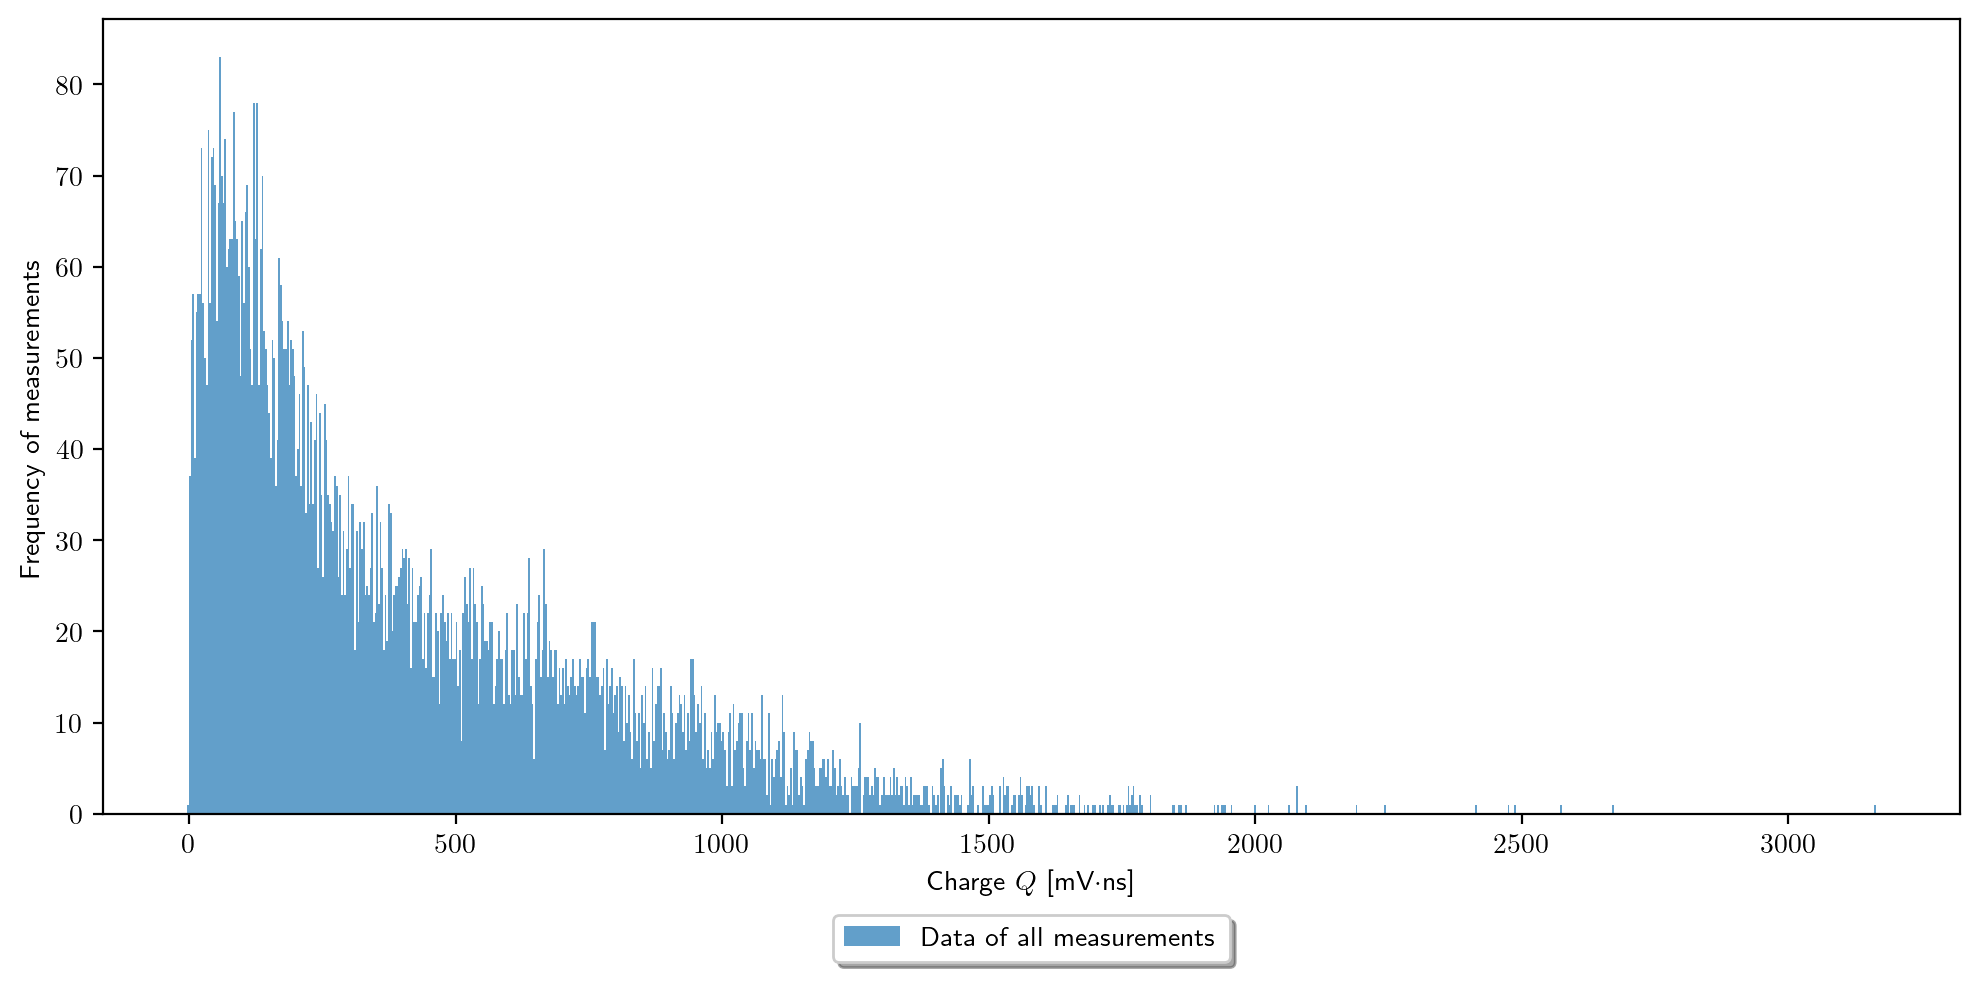

In [110]:
# overall spectrum 
plt.figure(figsize=(10,5), dpi=200)
plt.hist(all_Q_values, bins=1000, alpha=0.7, label=r"Data of all measurements")
plt.xlabel(r"Charge $Q$ [mV$\cdot$ns]")
plt.ylabel(r"Frequency of measurements")

plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.11), fancybox=True, shadow=True, ncol=2)
plt.tight_layout()
plt.savefig("Aufgabe_1_overall_SPE.pdf")
plt.show()

### Fitten von 2 Gauß Funktionene

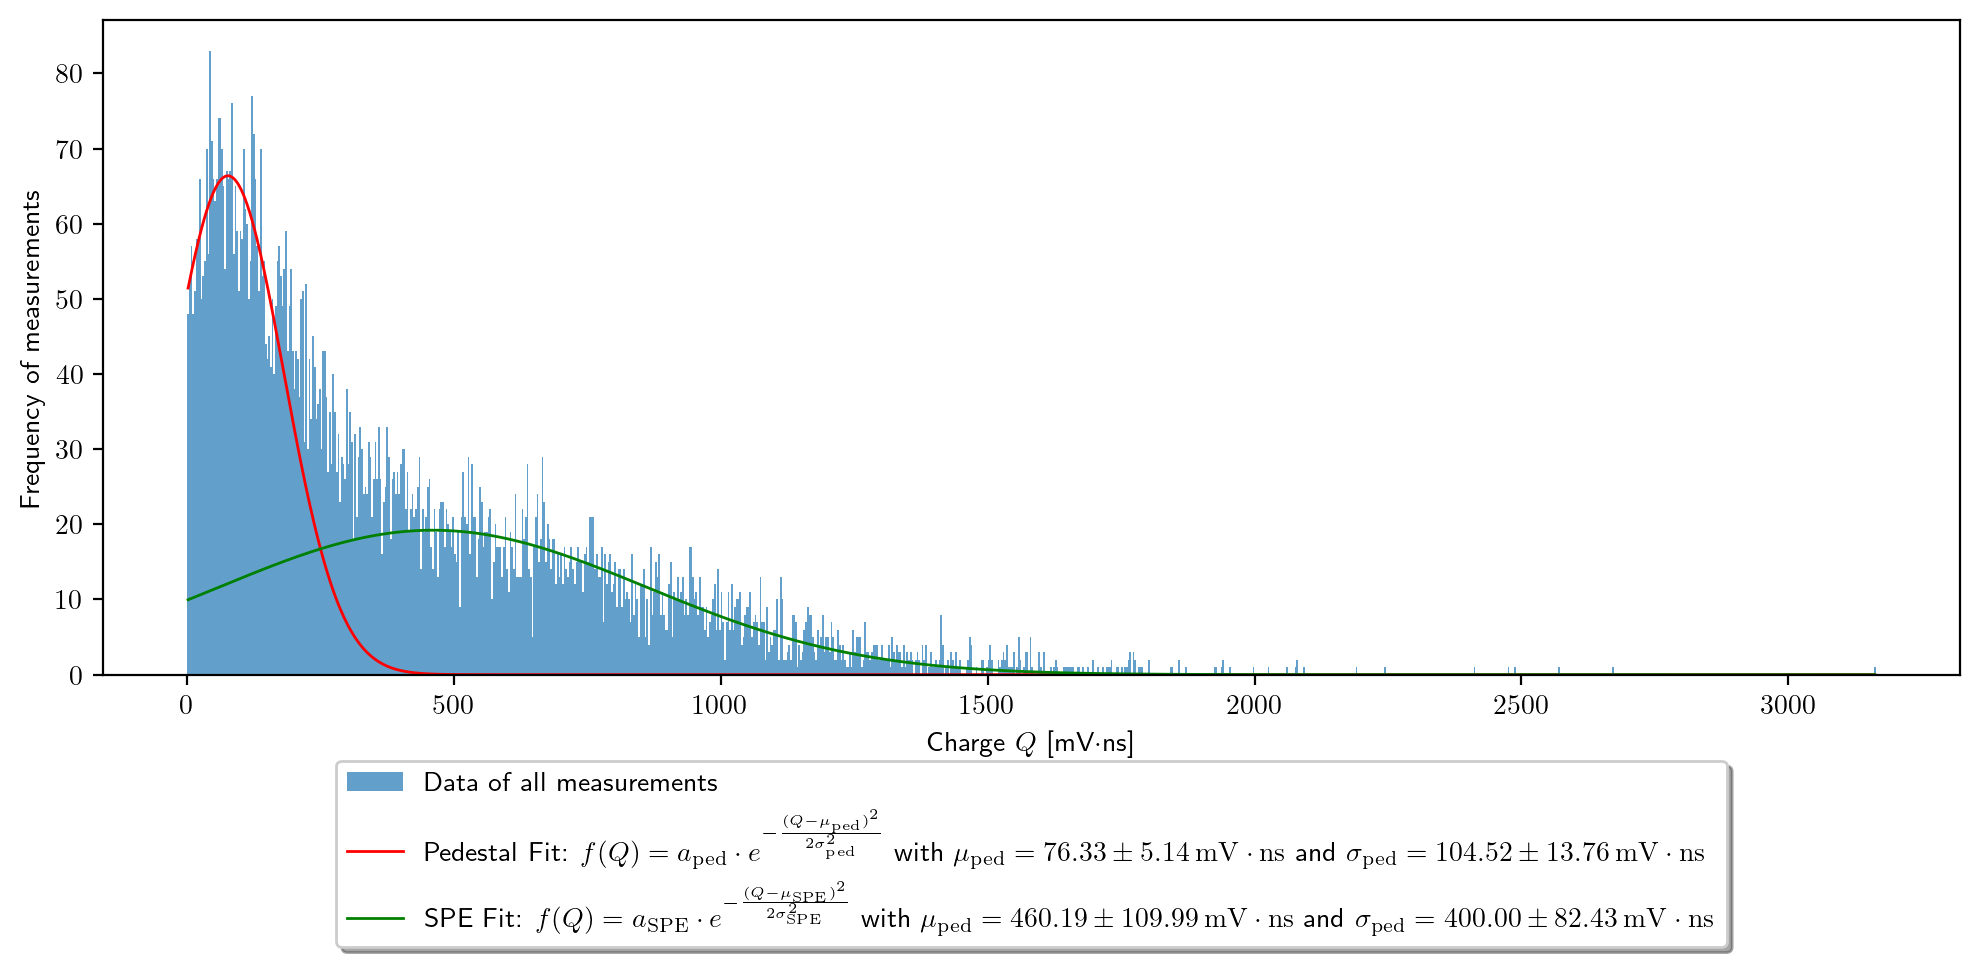


Pedestal:
  mu = 76.33 ± 5.14 mV·ns
  sigma = 104.52 ± 13.76

SPE:
  mu = 460.19 ± 109.99 mV·ns
  sigma = 400.00 ± 82.43
9.203739238318087e-12
2.1998972122998816e-12

Gain = (5.745e+07 ± 1.373e+07) e⁻


In [112]:
from scipy.optimize import curve_fit
from scipy.constants import e

R = 50  # Ohm

# preparing the data 
q = np.asarray(all_Q_values, dtype=float)
q = q[np.isfinite(q) & (q >= 0)]   # filter

# plotting the histogram
hist, bins = np.histogram(q, bins=1000)
bin_centers = 0.5*(bins[:-1] + bins[1:])

plt.figure(figsize=(10,5), dpi=200)
plt.hist(q, bins=1000, alpha=0.7, label=r"Data of all measurements")
plt.xlabel(r"Charge $Q$ [mV$\cdot$ns]")
plt.ylabel(r"Frequency of measurements")


# Gaussian fit function
def gauss(x, A, mu, sigma):
    return A*np.exp(-(x-mu)**2/(2*sigma**2))


# 1. fit -> pedestal fit 
mask1 = (bin_centers >= 0) & (bin_centers <= 150)
x1 = bin_centers[mask1]
y1 = hist[mask1]
x1 = x1[y1 > 0]
y1 = y1[y1 > 0]

A1 = mu1 = s1 = np.nan
dmu1 = ds1 = np.nan

if len(x1) > 5:
    p0_1 = [y1.max()*2.0, 100, 30]
    bounds_1 = ([0, 0, 5], [np.inf, 250, 150])
    (A1, mu1, s1), cov1 = curve_fit(gauss, x1, y1, p0=p0_1, bounds=bounds_1)

    #errors given by the covariance
    dmu1 = np.sqrt(cov1[1,1])
    ds1 = np.sqrt(cov1[2,2])


# 2. Fit -> SPE fit function 
mask2 = (bin_centers >= 500) & (bin_centers <= 1000)
x2 = bin_centers[mask2]
y2 = hist[mask2]
x2 = x2[y2 > 0]
y2 = y2[y2 > 0]

A2 = mu2 = s2 = np.nan
dmu2 = ds2 = np.nan

if len(x2) > 5:
    p0_2 = [y2.max()*1.2, 350, 120] 
    bounds_2 = ([0, 250, 20], [np.inf, 750, 400])
    (A2, mu2, s2), cov2 = curve_fit(gauss, x2, y2, p0=p0_2, bounds=bounds_2)

    dmu2 = np.sqrt(cov2[1,1])  # eeror of peak position
    ds2 = np.sqrt(cov2[2,2])   # error of peak width


# gaus functions over the whole spectrum 
xf = np.linspace(bin_centers.min(), bin_centers.max(), 2000)

if np.isfinite(mu1):
    plt.plot(xf, gauss(xf, A1, mu1, s1), 'r-', lw=1.0, label=r"Pedestal Fit: $f(Q)=a_\mathrm{ped}\cdot e^{-\frac{(Q-\mu_\mathrm{ped})^2}{2\sigma_\mathrm{ped}^2}}$ with $\mu_\mathrm{ped}=76.33 \pm 5.14 \: \mathrm{mV\cdot ns}$ and $\sigma_\mathrm{ped}=104.52 \pm 13.76 \: \mathrm{mV\cdot ns}$")

if np.isfinite(mu2):
    plt.plot(xf, gauss(xf, A2, mu2, s2), 'g-', lw=1.0, label=r"SPE Fit: $f(Q)=a_\mathrm{SPE}\cdot e^{-\frac{(Q-\mu_\mathrm{SPE})^2}{2\sigma_\mathrm{SPE}^2}}$ with $\mu_\mathrm{ped}=460.19 \pm 109.99\: \mathrm{mV\cdot ns}$ and $\sigma_\mathrm{ped}=400.00 \pm 82.43 \:\mathrm{mV\cdot ns}$")

plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.11), fancybox=True, shadow=True, ncol=1)
plt.tight_layout()
plt.savefig("Aufgabe_1_overall_SPE_Fit.pdf")
plt.show()


# printing out the obtained results
print()
if np.isfinite(mu1):
    print(f"Pedestal:")
    print(f"  mu = {mu1:.2f} ± {dmu1:.2f} mV·ns")
    print(f"  sigma = {s1:.2f} ± {ds1:.2f}\n")

if np.isfinite(mu2):
    print(f"SPE:")
    print(f"  mu = {mu2:.2f} ± {dmu2:.2f} mV·ns")
    print(f"  sigma = {s2:.2f} ± {ds2:.2f}")

    # computing the amplification factor and its error
    Q_C = mu2 * 1e-12 / R
    dQ_C = dmu2 * 1e-12 / R

    # printing out Q_c -> needed in the report 
    print(Q_C)
    print(dQ_C)
    Gain = Q_C / e
    dGain = Gain * (dmu2 / mu2)   # relative error

    print(f"\nGain = ({Gain:.3e} ± {dGain:.3e}) e⁻")

else:
    print("SPE-Fit fehlgeschlagen.")
